# Yahoo! song dataset Recommendation system

Team Members:

1. Ashwini Giri
2. Tanay Shankar
3. Prashanth Manja

In [2]:
import pandas as pd
import numpy as np
import csv
import json
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Reading train data

In [10]:
columns=['userid','songid','rating']
train0 = pd.read_csv('train_0.txt',delimiter='\t',names=columns,header=None)
train0.shape

(76344627, 3)

readig test data

In [11]:
test0 = pd.read_csv('test_0.txt',delimiter='\t',names=columns,header=None)
test0.shape

(2000000, 3)

In [12]:
most_rated = train0['songid'].value_counts(sort=True)
most_rated_songs = most_rated[:5].index.tolist()
most_rated_songs

[72309, 105433, 22763, 123176, 36561]

In [13]:
querystr = ''
for s in most_rated_songs:
    querystr+='songid=='+str(s)+' or '
querystr=querystr[:-4]
querystr

'songid==72309 or songid==105433 or songid==22763 or songid==123176 or songid==36561'

In [9]:
val = train0.query(querystr)

In [7]:
training = test0.query(querystr)
train_utility = training.pivot(index='songid',columns='userid',values='rating')
train_utility

userid,5,57,58,83,154,178,189,197,288,350,...,199781,199835,199844,199851,199857,199882,199892,199917,199945,199969
songid,,,,,,,,,,,,,,,,,,,,,
22763,NaN,NaN,NaN,1.0,NaN,3.0,1.0,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,2.0,4.0,NaN,NaN,3.0,NaN
36561,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,3.0,...,1.0,NaN,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN
72309,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
105433,4.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,...,NaN,NaN,3.0,3.0,NaN,NaN,NaN,1.0,NaN,NaN
123176,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,4.0,NaN


In [8]:
users = train_utility.columns.tolist()

In [9]:
final_val = val.query('userid in [5, 57, 58, 83, 154, 178, 189, 197, 288, 350, 360, 364, 407, 412, 427, 429, 446, 466, 467, 503, 543, 549, 597, 599, 650, 728, 745, 771, 781, 830, 847, 887, 902, 907, 925, 985, 1008, 1050, 1057, 1061, 1090, 1092, 1129, 1154, 1185, 1223, 1250, 1261, 1318, 1355, 1373, 1401, 1410, 1490, 1525, 1548, 1559, 1583, 1618, 1652, 1655, 1698, 1712, 1794, 1796, 1839, 1883, 1891, 1981, 2006, 2020, 2055, 2059, 2061, 2068, 2092, 2130, 2212, 2221, 2241, 2274, 2281, 2297, 2300, 2339, 2362, 2415, 2424, 2446, 2484, 2487, 2500, 2534, 2607, 2626, 2627, 2718, 2740, 2767, 2772, 2779, 2804, 2805, 2852, 2903, 2991, 3001, 3043, 3146, 3176, 3192, 3193, 3267, 3388, 3416, 3426, 3454, 3488, 3491, 3509, 3515, 3521, 3525, 3565, 3599, 3600, 3607, 3609, 3694, 3778, 3802, 3805, 3823, 3907, 3918, 3946, 4024, 4054, 4074, 4091, 4167, 4178, 4201, 4211, 4216, 4314, 4319, 4375, 4392, 4411, 4447, 4547, 4585, 4593, 4595, 4597, 4632, 4637, 4643, 4645, 4663, 4774, 4800, 4809, 4849, 4890, 4930, 4934, 4978, 4995, 5042, 5060, 5091, 5110, 5142, 5173, 5186, 5187, 5195, 5234, 5267, 5299, 5301, 5386, 5394, 5431, 5435, 5468, 5498, 5524, 5542, 5558, 5565, 5568, 5584, 5587, 5643, 5673, 5685, 5692, 5765, 5779, 5782, 5789, 5829, 5893, 5897, 5915, 5918, 5958, 5972, 6006, 6097, 6113, 6122, 6190, 6211, 6212, 6216, 6242, 6243, 6287, 6313, 6317, 6321, 6340, 6355, 6380, 6385, 6418, 6496, 6528, 6540, 6600, 6698, 6765, 6804, 6846, 6854, 6861, 6884, 6904, 6915, 6917, 6940, 6972, 7008, 7018, 7029, 7038, 7052, 7078, 7080, 7089, 7094, 7099, 7137, 7166, 7215, 7219, 7239, 7251, 7270, 7293, 7330, 7351, 7375, 7473, 7496, 7528, 7531, 7621, 7651, 7654, 7660, 7679, 7681, 7691, 7749, 7806, 7883, 7891, 7899, 7909, 7928, 7944, 7950, 7974, 8044, 8058, 8089, 8137, 8225, 8229, 8230, 8237, 8277, 8282, 8351, 8372, 8401, 8443, 8470, 8543, 8603, 8663, 8665, 8671, 8727, 8737, 8739, 8779, 8816, 8818, 8857, 8873, 8928, 8997, 9110, 9120, 9135, 9158, 9178, 9189, 9191, 9203, 9229, 9248, 9250, 9260, 9272, 9293, 9303, 9323, 9331, 9338, 9339, 9340, 9355, 9409, 9434, 9445, 9449, 9465, 9473, 9530, 9596, 9659, 9676, 9707, 9740, 9760, 9777, 9779, 9786, 9788, 9815, 9875, 9884, 9917, 9959, 9962, 9984, 10017, 10040, 10045, 10050, 10051, 10068, 10085, 10126, 10147, 10179, 10186, 10253, 10263, 10266, 10288, 10311, 10319, 10325, 10346, 10356, 10378, 10380, 10419, 10439, 10441, 10484, 10494, 10499, 10528, 10563, 10589, 10617, 10669, 10673, 10687, 10710, 10778, 10781, 10830, 10893, 10929, 10931, 10959, 10977, 10998, 11014, 11032, 11069, 11087, 11094, 11127, 11145, 11171, 11265, 11307, 11385, 11405, 11425, 11475, 11487, 11503, 11518, 11540, 11547, 11557, 11567, 11615, 11616, 11662, 11682, 11691, 11700, 11704, 11709, 11758, 11768, 11771, 11784, 11792, 11810, 11813, 11961, 11987, 12054, 12062, 12071, 12082, 12106, 12154, 12159, 12162, 12169, 12184, 12256, 12257, 12318, 12340, 12342, 12372, 12374, 12392, 12406, 12436, 12442, 12496, 12506, 12509, 12620, 12639, 12699, 12700, 12737, 12779, 12788, 12874, 12915, 12922, 12927, 12943, 12985, 13012, 13105, 13118, 13122, 13156, 13168, 13189, 13243, 13310, 13323, 13325, 13346, 13354, 13368, 13371, 13376, 13385, 13400, 13444, 13480, 13504, 13541, 13575, 13577, 13590, 13656, 13674, 13676, 13735, 13746, 13877, 13879, 13890, 13894, 13952, 13964, 13968, 13972, 13989, 14025, 14082, 14091, 14092, 14132, 14148, 14149, 14171, 14173, 14330, 14366, 14496, 14508, 14530, 14537, 14545, 14573, 14590, 14592, 14609, 14616, 14622, 14633, 14675, 14689, 14727, 14730, 14789, 14833, 14847, 14858, 14864, 14918, 14925, 14947, 14986, 15027, 15034, 15040, 15070, 15084, 15098, 15106, 15120, 15127, 15132, 15151, 15197, 15198, 15199, 15232, 15241, 15268, 15270, 15287, 15338, 15356, 15403, 15468, 15524, 15545, 15565, 15569, 15572, 15668, 15692, 15699, 15712, 15727, 15732, 15734, 15735, 15756, 15759, 15762, 15799, 15807, 15822, 15826, 15831, 15835, 15837, 15852, 15900, 15928, 15952, 15962, 16009, 16017, 16021, 16082, 16095, 16102, 16109, 16137, 16161, 16171, 16181, 16228, 16251, 16308, 16363, 16364, 16372, 16376, 16390, 16410, 16413, 16428, 16429, 16435, 16456, 16489, 16496, 16503, 16517, 16534, 16536, 16595, 16635, 16649, 16755, 16794, 16813, 16860, 16861, 16897, 16908, 16911, 16944, 16978, 16990, 16992, 16996, 17015, 17033, 17049, 17054, 17081, 17101, 17145, 17179, 17194, 17209, 17231, 17257, 17291, 17294, 17315, 17330, 17407, 17426, 17459, 17468, 17487, 17490, 17544, 17555, 17570, 17591, 17600, 17610, 17611, 17627, 17635, 17666, 17714, 17733, 17776, 17787, 17859, 17862, 17866, 17880, 17902, 17953, 18021, 18154, 18189, 18203, 18210, 18226, 18290, 18291, 18299, 18305, 18314, 18388, 18390, 18392, 18453, 18456, 18460, 18486, 18501, 18583, 18648, 18670, 18673, 18683, 18686, 18688, 18799, 18806, 18896, 18901, 18922, 18963, 19050, 19075, 19076, 19078, 19138, 19154, 19156, 19203, 19211, 19246, 19270, 19328, 19343, 19357, 19462, 19496, 19503, 19521, 19531, 19611, 19617, 19688, 19737, 19744, 19809, 19816, 19882, 19922, 19978, 19982, 19990, 20014, 20073, 20085, 20097, 20120, 20153, 20163, 20166, 20255, 20277, 20296, 20313, 20359, 20362, 20390, 20433, 20438, 20447, 20458, 20468, 20492, 20538, 20584, 20588, 20605, 20640, 20658, 20780, 20796, 20803, 20875, 20923, 20927, 20935, 20943, 20947, 20973, 20995, 21017, 21056, 21123, 21125, 21141, 21177, 21186, 21192, 21202, 21211, 21248, 21252, 21269, 21276, 21283, 21332, 21352, 21394, 21409, 21498, 21562, 21647, 21650, 21674, 21699, 21742, 21744, 21758, 21761, 21794, 21858, 21870, 21882, 21905, 21911, 21933, 21953, 21987, 22001, 22024, 22059, 22066, 22080, 22128, 22168, 22200, 22215, 22242, 22297, 22300, 22320, 22326, 22331, 22339, 22345, 22349, 22356, 22406, 22411, 22427, 22435, 22466, 22500, 22553, 22556, 22565, 22568, 22577, 22604, 22609, 22618, 22634, 22671, 22692, 22704, 22802, 22829, 22848, 22861, 22863, 22880, 22890, 22900, 22907, 22909, 22939, 22966, 22981, 23063, 23066, 23080, 23081, 23102, 23113, 23151, 23182, 23184, 23200, 23222, 23227, 23246, 23258, 23278, 23341, 23367, 23424, 23445, 23485, 23493, 23532, 23546, 23562, 23566, 23583, 23599, 23640, 23658, 23730, 23734, 23739, 23795, 23828, 23829, 23830, 23831, 23835, 23849, 23855, 23869, 23889, 23963, 23991, 24050, 24072, 24131, 24172, 24202, 24218, 24223, 24295, 24367, 24371, 24373, 24374, 24385, 24406, 24414, 24426, 24512, 24519, 24554, 24576, 24587, 24611, 24616, 24660, 24700, 24705, 24710, 24753, 24791, 24806, 24822, 24874, 24914, 24916, 24927, 24931, 24935, 24938, 24939, 24943, 25004, 25108, 25156, 25165, 25178, 25272, 25295, 25340, 25355, 25380, 25389, 25419, 25427, 25506, 25509, 25520, 25574, 25630, 25635, 25661, 25677, 25678, 25719, 25727, 25756, 25759, 25771, 25798, 25818, 25830, 25842, 25878, 25896, 25977, 25983, 26036, 26043, 26049, 26058, 26064, 26080, 26096, 26102, 26115, 26120, 26126, 26280, 26282, 26438, 26483, 26500, 26523, 26524, 26533, 26564, 26641, 26642, 26643, 26678, 26715, 26738, 26759, 26788, 26801, 26802, 26829, 26851, 26874, 26877, 26886, 26914, 26928, 26932, 26974, 27001, 27012, 27029, 27040, 27069, 27070, 27177, 27220, 27245, 27272, 27317, 27335, 27370, 27461, 27468, 27490, 27502, 27509, 27534, 27572, 27639, 27688, 27710, 27713, 27752, 27758, 27870, 27918, 27926, 28039, 28043, 28063, 28088, 28114, 28154, 28217, 28222, 28266, 28273, 28289, 28311, 28319, 28368, 28445, 28455, 28473, 28485, 28515, 28551, 28588, 28598, 28637, 28640, 28663, 28710, 28712, 28765, 28767, 28803, 28816, 28889, 28899, 28954, 29015, 29023, 29027, 29032, 29076, 29095, 29109, 29140, 29196, 29231, 29243, 29284, 29288, 29299, 29335, 29364, 29386, 29391, 29404, 29419, 29614, 29653, 29658, 29667, 29683, 29721, 29735, 29738, 29741, 29866, 29918, 29922, 29973, 30024, 30032, 30044, 30062, 30081, 30095, 30137, 30196, 30217, 30227, 30250, 30273, 30275, 30356, 30423, 30438, 30444, 30455, 30508, 30522, 30537, 30550, 30563, 30585, 30586, 30588, 30589, 30613, 30622, 30657, 30674, 30694, 30695, 30763, 30769, 30778, 30833, 30886, 30916, 30920, 30923, 30944, 30949, 30960, 30975, 31003, 31036, 31105, 31140, 31164, 31171, 31209, 31264, 31275, 31307, 31310, 31364, 31366, 31387, 31411, 31418, 31456, 31680, 31695, 31755, 31777, 31803, 31822, 31839, 31932, 31951, 31981, 32031, 32047, 32051, 32056, 32057, 32099, 32106, 32120, 32160, 32259, 32280, 32309, 32355, 32395, 32409, 32421, 32424, 32428, 32447, 32511, 32520, 32533, 32569, 32604, 32607, 32632, 32643, 32661, 32697, 32701, 32709, 32731, 32785, 32823, 32873, 32877, 32905, 32978, 32986, 33004, 33027, 33032, 33060, 33068, 33075, 33149, 33209, 33228, 33240, 33254, 33263, 33269, 33315, 33336, 33352, 33420, 33439, 33440, 33468, 33513, 33521, 33555, 33601, 33631, 33659, 33660, 33678, 33755, 33764, 33790, 33797, 33820, 33884, 33892, 33922, 33926, 33970, 34002, 34005, 34080, 34088, 34099, 34146, 34158, 34180, 34216, 34246, 34269, 34291, 34294, 34326, 34389, 34439, 34451, 34460, 34491, 34495, 34543, 34590, 34594, 34607, 34624, 34675, 34684, 34687, 34754, 34769, 34797, 34847, 34865, 34919, 34997, 35046, 35063, 35132, 35192, 35210, 35223, 35269, 35299, 35310, 35320, 35385, 35392, 35422, 35469, 35474, 35493, 35528, 35533, 35556, 35575, 35576, 35582, 35624, 35638, 35654, 35679, 35699, 35710, 35751, 35752, 35788, 35832, 35843, 35856, 35872, 35881, 35886, 35905, 35909, 35910, 35937, 35941, 35943, 35982, 35984, 35991, 36009, 36031, 36032, 36089, 36096, 36133, 36146, 36173, 36176, 36178, 36246, 36249, 36271, 36296, 36299, 36338, 36343, 36350, 36353, 36401, 36419, 36456, 36509, 36520, 36525, 36530, 36604, 36630, 36634, 36658, 36693, 36704, 36732, 36739, 36749, 36753, 36827, 36845, 36867, 36882, 37015, 37020, 37026, 37047, 37071, 37079, 37095, 37115, 37119, 37149, 37154, 37160, 37239, 37279, 37290, 37297, 37299, 37304, 37335, 37350, 37351, 37415, 37432, 37436, 37457, 37516, 37518, 37562, 37626, 37641, 37660, 37672, 37678, 37689, 37710, 37716, 37730, 37736, 37782, 37825, 37852, 37867, 37873, 37914, 37926, 37943, 37969, 37981, 38013, 38078, 38131, 38170, 38241, 38252, 38273, 38319, 38384, 38388, 38433, 38442, 38450, 38456, 38462, 38468, 38487, 38522, 38536, 38585, 38624, 38646, 38757, 38775, 38829, 38873, 38875, 38891, 38925, 38935, 38945, 38951, 38953, 38954, 38978, 38987, 39027, 39044, 39048, 39088, 39129, 39134, 39135, 39158, 39159, 39198, 39243, 39251, 39305, 39330, 39334, 39376, 39386, 39393, 39415, 39435, 39470, 39472, 39486, 39514, 39530, 39556, 39579, 39630, 39633, 39640, 39766, 39808, 39839, 39840, 39862, 39871, 39875, 39876, 39945, 39958, 39964, 39979, 39996, 40056, 40091, 40129, 40153, 40168, 40174, 40189, 40190, 40206, 40209, 40223, 40237, 40290, 40302, 40353, 40400, 40402, 40424, 40545, 40589, 40597, 40600, 40621, 40623, 40628, 40656, 40667, 40668, 40687, 40689, 40691, 40714, 40751, 40794, 40797, 40811, 40841, 40884, 40922, 40939, 40945, 40954, 40956, 40963, 40985, 40986, 41036, 41118, 41166, 41169, 41213, 41254, 41269, 41288, 41318, 41323, 41403, 41439, 41442, 41471, 41480, 41484, 41493, 41497, 41530, 41553, 41635, 41645, 41659, 41694, 41716, 41741, 41742, 41776, 41810, 41819, 41830, 41840, 41873, 41876, 41882, 41933, 41969, 41994, 41998, 42019, 42040, 42057, 42091, 42116, 42123, 42144, 42195, 42231, 42244, 42290, 42302, 42314, 42318, 42345, 42350, 42404, 42405, 42452, 42475, 42486, 42505, 42547, 42594, 42647, 42660, 42661, 42671, 42744, 42773, 42776, 42788, 42808, 42844, 42852, 42872, 42886, 42890, 42959, 43052, 43066, 43083, 43089, 43091, 43196, 43200, 43205, 43349, 43358, 43404, 43458, 43560, 43590, 43619, 43690, 43732, 43742, 43916, 43921, 43929, 43947, 43982, 44035, 44047, 44065, 44095, 44101, 44118, 44131, 44141, 44155, 44184, 44189, 44217, 44223, 44279, 44316, 44344, 44409, 44460, 44575, 44633, 44686, 44688, 44759, 44778, 44779, 44812, 44819, 44840, 44850, 44859, 44871, 44889, 44900, 44949, 44958, 44977, 44978, 44979, 44990, 44999, 45064, 45107, 45191, 45220, 45231, 45266, 45292, 45313, 45348, 45366, 45382, 45385, 45428, 45436, 45462, 45464, 45507, 45601, 45602, 45629, 45645, 45661, 45693, 45706, 45726, 45741, 45797, 45809, 45837, 45847, 45887, 45913, 45924, 45930, 45935, 45952, 45965, 45970, 46054, 46065, 46073, 46131, 46147, 46158, 46171, 46172, 46215, 46269, 46274, 46310, 46311, 46315, 46332, 46342, 46371, 46386, 46390, 46425, 46438, 46441, 46590, 46616, 46663, 46704, 46712, 46718, 46760, 46761, 46764, 46806, 46819, 46822, 46829, 46915, 46946, 46964, 47062, 47111, 47149, 47160, 47161, 47179, 47209, 47224, 47233, 47244, 47258, 47276, 47321, 47327, 47364, 47397, 47411, 47413, 47437, 47449, 47466, 47476, 47493, 47513, 47514, 47534, 47537, 47538, 47544, 47558, 47620, 47628, 47655, 47707, 47723, 47777, 47795, 47846, 47954, 47957, 47979, 48013, 48016, 48047, 48071, 48074, 48105, 48119, 48121, 48126, 48163, 48249, 48252, 48275, 48293, 48340, 48353, 48355, 48372, 48383, 48398, 48424, 48454, 48469, 48511, 48530, 48533, 48600, 48601, 48612, 48645, 48706, 48736, 48797, 48810, 48843, 48878, 48900, 48925, 48965, 48988, 49061, 49066, 49076, 49077, 49166, 49186, 49237, 49249, 49268, 49291, 49307, 49318, 49347, 49383, 49404, 49443, 49454, 49525, 49537, 49571, 49581, 49597, 49613, 49725, 49764, 49772, 49800, 49805, 49807, 49828, 49837, 49876, 49959, 50011, 50068, 50089, 50103, 50105, 50116, 50145, 50148, 50155, 50159, 50174, 50207, 50285, 50304, 50359, 50360, 50370, 50385, 50435, 50474, 50491, 50501, 50528, 50542, 50549, 50577, 50590, 50591, 50593, 50619, 50703, 50717, 50732, 50755, 50775, 50783, 50811, 50816, 50823, 50832, 50853, 50883, 50938, 50946, 50949, 50975, 50985, 51013, 51024, 51025, 51027, 51033, 51045, 51073, 51141, 51176, 51184, 51236, 51273, 51314, 51349, 51395, 51463, 51466, 51475, 51479, 51487, 51581, 51593, 51596, 51634, 51657, 51680, 51687, 51703, 51712, 51719, 51744, 51756, 51789, 51793, 51798, 51822, 51847, 51945, 51948, 51952, 51955, 52016, 52040, 52146, 52166, 52191, 52212, 52222, 52227, 52270, 52281, 52295, 52354, 52356, 52370, 52372, 52377, 52390, 52396, 52409, 52414, 52420, 52496, 52520, 52534, 52594, 52598, 52608, 52627, 52655, 52659, 52662, 52709, 52741, 52749, 52756, 52779, 52799, 52812, 52832, 52855, 52872, 52918, 52929, 52935, 52954, 52962, 53009, 53067, 53100, 53110, 53113, 53122, 53150, 53153, 53167, 53178, 53202, 53223, 53229, 53231, 53237, 53273, 53289, 53334, 53381, 53404, 53487, 53543, 53556, 53582, 53599, 53632, 53654, 53699, 53748, 53752, 53793, 53799, 53852, 53885, 53965, 53971, 53973, 53982, 53985, 54000, 54054, 54066, 54081, 54086, 54087, 54174, 54175, 54188, 54204, 54211, 54234, 54241, 54311, 54325, 54330, 54360, 54398, 54486, 54503, 54511, 54545, 54557, 54562, 54586, 54606, 54633, 54648, 54657, 54663, 54730, 54734, 54837, 54840, 54858, 54892, 54936, 55049, 55053, 55079, 55083, 55104, 55107, 55116, 55145, 55171, 55211, 55227, 55235, 55247, 55249, 55288, 55309, 55418, 55458, 55491, 55553, 55566, 55715, 55722, 55724, 55728, 55752, 55759, 55845, 55851, 55876, 55889, 55973, 55997, 56039, 56049, 56103, 56183, 56187, 56217, 56224, 56251, 56293, 56307, 56313, 56317, 56338, 56358, 56376, 56394, 56424, 56445, 56480, 56511, 56535, 56561, 56607, 56625, 56646, 56648, 56649, 56661, 56662, 56669, 56711, 56766, 56767, 56777, 56782, 56791, 56824, 56888, 56895, 56900, 56910, 56913, 56991, 57008, 57010, 57029, 57067, 57110, 57147, 57197, 57205, 57207, 57241, 57267, 57287, 57340, 57351, 57391, 57420, 57448, 57451, 57457, 57468, 57470, 57511, 57525, 57527, 57557, 57571, 57575, 57591, 57632, 57643, 57716, 57738, 57772, 57826, 57835, 57877, 57892, 57954, 58014, 58024, 58029, 58058, 58060, 58071, 58121, 58128, 58148, 58227, 58261, 58274, 58276, 58286, 58292, 58299, 58306, 58342, 58400, 58419, 58424, 58451, 58473, 58481, 58485, 58549, 58556, 58560, 58582, 58594, 58625, 58645, 58680, 58694, 58765, 58769, 58784, 58793, 58850, 58878, 58886, 58891, 58892, 58969, 59026, 59042, 59044, 59052, 59076, 59153, 59162, 59173, 59187, 59235, 59238, 59240, 59249, 59320, 59353, 59358, 59364, 59369, 59440, 59455, 59470, 59485, 59513, 59514, 59533, 59575, 59600, 59607, 59672, 59693, 59703, 59708, 59778, 59785, 59822, 59840, 59861, 59886, 59915, 59922, 59942, 59953, 60003, 60006, 60036, 60043, 60072, 60110, 60127, 60131, 60215, 60217, 60288, 60329, 60330, 60337, 60345, 60379, 60382, 60400, 60414, 60416, 60444, 60452, 60473, 60498, 60505, 60513, 60518, 60544, 60566, 60583, 60592, 60639, 60722, 60730, 60768, 60786, 60835, 60836, 60870, 60875, 60942, 60950, 61030, 61042, 61073, 61079, 61110, 61143, 61149, 61163, 61192, 61238, 61250, 61278, 61354, 61387, 61390, 61414, 61472, 61482, 61534, 61538, 61547, 61555, 61591, 61594, 61634, 61636, 61681, 61697, 61737, 61750, 61764, 61776, 61786, 61810, 61815, 61824, 61838, 61889, 61923, 62022, 62099, 62111, 62152, 62174, 62184, 62269, 62271, 62329, 62363, 62398, 62485, 62504, 62509, 62535, 62538, 62544, 62545, 62559, 62587, 62608, 62611, 62671, 62708, 62718, 62871, 62872, 62876, 62899, 63015, 63030, 63052, 63055, 63057, 63084, 63123, 63127, 63154, 63234, 63360, 63361, 63373, 63378, 63405, 63415, 63433, 63485, 63539, 63545, 63549, 63563, 63591, 63604, 63609, 63643, 63688, 63705, 63759, 63813, 63853, 63886, 63923, 63950, 63971, 63973, 64096, 64113, 64206, 64207, 64219, 64229, 64244, 64249, 64258, 64280, 64296, 64307, 64310, 64339, 64347, 64365, 64371, 64417, 64424, 64430, 64438, 64480, 64513, 64523, 64533, 64582, 64614, 64661, 64665, 64686, 64693, 64717, 64732, 64741, 64750, 64797, 64847, 64888, 64945, 64991, 65032, 65045, 65107, 65131, 65153, 65155, 65179, 65229, 65243, 65288, 65296, 65320, 65327, 65363, 65413, 65448, 65478, 65481, 65533, 65541, 65585, 65630, 65644, 65686, 65692, 65701, 65791, 65794, 65799, 65894, 65905, 65921, 65932, 65984, 65991, 66003, 66029, 66088, 66111, 66159, 66234, 66252, 66287, 66321, 66366, 66388, 66404, 66415, 66428, 66447, 66448, 66478, 66485, 66536, 66540, 66581, 66586, 66618, 66630, 66644, 66710, 66733, 66734, 66794, 66796, 66806, 66816, 66847, 66853, 66889, 66914, 66965, 66970, 66985, 66995, 67015, 67080, 67082, 67132, 67143, 67158, 67186, 67189, 67195, 67197, 67214, 67231, 67242, 67268, 67271, 67281, 67299, 67320, 67338, 67383, 67412, 67420, 67433, 67441, 67497, 67504, 67514, 67523, 67544, 67588, 67596, 67621, 67641, 67643, 67712, 67721, 67743, 67805, 67843, 67902, 67919, 67954, 67958, 68015, 68022, 68062, 68133, 68150, 68153, 68211, 68221, 68229, 68247, 68262, 68284, 68299, 68300, 68305, 68312, 68335, 68375, 68383, 68425, 68449, 68457, 68478, 68523, 68536, 68540, 68557, 68573, 68616, 68621, 68647, 68720, 68742, 68794, 68808, 68817, 68851, 68882, 68922, 68924, 68925, 68936, 69091, 69138, 69146, 69147, 69149, 69177, 69185, 69205, 69224, 69235, 69257, 69269, 69274, 69284, 69293, 69295, 69301, 69314, 69336, 69337, 69370, 69375, 69408, 69410, 69429, 69449, 69455, 69480, 69496, 69505, 69528, 69555, 69558, 69572, 69575, 69577, 69599, 69603, 69628, 69631, 69643, 69645, 69705, 69709, 69735, 69756, 69759, 69796, 69852, 69857, 69881, 69893, 69902, 69950, 69985, 69988, 70017, 70043, 70101, 70143, 70186, 70323, 70326, 70363, 70397, 70424, 70450, 70455, 70543, 70598, 70603, 70637, 70728, 70740, 70782, 70794, 70819, 70823, 70844, 70846, 70898, 70908, 70924, 70925, 70994, 71036, 71111, 71123, 71160, 71167, 71191, 71195, 71209, 71244, 71266, 71269, 71325, 71334, 71380, 71408, 71421, 71425, 71447, 71452, 71481, 71497, 71500, 71510, 71532, 71536, 71578, 71703, 71706, 71755, 71757, 71787, 71795, 71807, 71825, 71845, 71859, 71915, 71918, 71943, 71952, 71955, 71982, 72038, 72041, 72058, 72060, 72073, 72098, 72152, 72157, 72251, 72284, 72325, 72349, 72365, 72403, 72428, 72437, 72466, 72488, 72517, 72522, 72543, 72561, 72563, 72614, 72619, 72751, 72755, 72792, 72793, 72817, 72820, 72887, 72918, 72957, 72963, 72995, 72997, 73039, 73092, 73105, 73127, 73138, 73202, 73219, 73231, 73280, 73282, 73304, 73325, 73375, 73376, 73393, 73441, 73446, 73483, 73484, 73501, 73520, 73525, 73536, 73547, 73548, 73551, 73569, 73591, 73609, 73640, 73662, 73698, 73707, 73710, 73734, 73748, 73773, 73853, 73875, 73904, 73908, 74063, 74072, 74095, 74115, 74118, 74150, 74275, 74343, 74345, 74352, 74360, 74381, 74384, 74496, 74501, 74507, 74508, 74545, 74576, 74586, 74587, 74614, 74623, 74640, 74641, 74686, 74695, 74699, 74702, 74749, 74762, 74767, 74780, 74834, 74840, 74851, 74867, 74916, 74918, 74936, 74944, 74946, 75004, 75011, 75047, 75086, 75118, 75147, 75168, 75175, 75281, 75283, 75299, 75364, 75372, 75393, 75417, 75425, 75453, 75496, 75516, 75518, 75545, 75567, 75590, 75625, 75641, 75683, 75767, 75772, 75778, 75828, 75880, 75909, 75932, 75955, 75964, 75966, 75973, 75992, 75994, 76047, 76059, 76071, 76075, 76107, 76117, 76124, 76150, 76172, 76194, 76232, 76249, 76256, 76301, 76302, 76309, 76321, 76374, 76400, 76401, 76412, 76422, 76444, 76447, 76450, 76455, 76472, 76480, 76529, 76549, 76560, 76583, 76603, 76605, 76621, 76622, 76660, 76674, 76684, 76740, 76763, 76826, 76838, 76847, 76888, 76919, 76921, 76938, 76943, 76956, 76964, 77029, 77042, 77067, 77144, 77191, 77197, 77201, 77203, 77207, 77209, 77227, 77233, 77241, 77269, 77366, 77376, 77406, 77411, 77419, 77451, 77453, 77499, 77551, 77611, 77620, 77733, 77745, 77760, 77788, 77819, 77929, 77975, 78021, 78029, 78080, 78109, 78139, 78176, 78203, 78243, 78262, 78290, 78343, 78354, 78358, 78380, 78435, 78498, 78504, 78547, 78560, 78577, 78580, 78582, 78590, 78598, 78617, 78645, 78704, 78735, 78808, 78809, 78831, 78836, 78843, 78912, 78982, 78989, 79008, 79014, 79051, 79083, 79084, 79122, 79170, 79196, 79243, 79325, 79354, 79397, 79450, 79589, 79607, 79619, 79641, 79657, 79678, 79685, 79692, 79714, 79718, 79762, 79768, 79796, 79799, 79810, 79874, 79906, 79958, 79970, 80021, 80041, 80047, 80102, 80111, 80115, 80167, 80209, 80226, 80229, 80235, 80239, 80260, 80262, 80263, 80331, 80332, 80355, 80362, 80484, 80490, 80568, 80606, 80627, 80661, 80686, 80706, 80725, 80750, 80752, 80755, 80759, 80780, 80788, 80795, 80846, 80877, 80879, 80906, 80949, 80966, 80995, 81057, 81087, 81091, 81129, 81160, 81188, 81200, 81248, 81303, 81308, 81317, 81327, 81341, 81381, 81386, 81423, 81433, 81464, 81486, 81488, 81505, 81514, 81576, 81607, 81673, 81683, 81688, 81756, 81786, 81805, 81868, 81872, 81888, 81904, 81959, 81988, 82020, 82053, 82119, 82121, 82125, 82135, 82149, 82179, 82255, 82299, 82343, 82377, 82417, 82461, 82505, 82517, 82534, 82535, 82562, 82619, 82653, 82656, 82678, 82688, 82706, 82737, 82740, 82755, 82778, 82815, 82824, 82865, 82874, 82911, 82931, 82948, 82961, 82993, 82996, 83022, 83049, 83056, 83077, 83118, 83123, 83131, 83146, 83148, 83149, 83181, 83197, 83198, 83232, 83262, 83386, 83437, 83442, 83446, 83477, 83578, 83586, 83626, 83638, 83645, 83683, 83694, 83757, 83779, 83798, 83873, 83891, 83892, 83930, 83968, 83995, 84042, 84048, 84050, 84051, 84065, 84070, 84139, 84140, 84152, 84164, 84191, 84198, 84222, 84246, 84259, 84268, 84284, 84313, 84314, 84317, 84321, 84342, 84345, 84348, 84364, 84374, 84383, 84402, 84409, 84429, 84467, 84468, 84485, 84516, 84530, 84551, 84580, 84586, 84617, 84651, 84728, 84793, 84823, 84868, 84897, 84903, 84915, 84921, 84966, 84968, 85006, 85013, 85015, 85119, 85132, 85164, 85178, 85231, 85254, 85284, 85328, 85379, 85407, 85429, 85440, 85443, 85466, 85513, 85518, 85522, 85542, 85555, 85600, 85617, 85619, 85626, 85637, 85655, 85661, 85680, 85687, 85724, 85730, 85738, 85761, 85766, 85773, 85778, 85802, 85827, 85840, 85859, 85879, 85916, 85919, 85954, 85971, 85978, 86037, 86053, 86073, 86087, 86110, 86149, 86152, 86180, 86190, 86240, 86271, 86299, 86305, 86328, 86395, 86410, 86445, 86483, 86499, 86516, 86526, 86537, 86543, 86609, 86618, 86619, 86667, 86674, 86709, 86724, 86751, 86809, 86810, 86823, 86824, 86855, 86881, 86904, 86912, 86916, 86988, 86989, 87020, 87041, 87119, 87120, 87135, 87147, 87158, 87175, 87178, 87188, 87193, 87251, 87281, 87287, 87323, 87330, 87340, 87416, 87445, 87503, 87508, 87527, 87528, 87529, 87572, 87604, 87616, 87670, 87687, 87721, 87811, 87817, 87899, 87900, 87917, 87933, 87939, 87976, 88001, 88015, 88037, 88043, 88067, 88100, 88130, 88144, 88186, 88201, 88212, 88213, 88234, 88235, 88300, 88312, 88318, 88332, 88370, 88403, 88456, 88515, 88518, 88519, 88523, 88532, 88549, 88585, 88600, 88613, 88630, 88675, 88722, 88752, 88782, 88865, 88926, 88962, 88991, 88996, 89048, 89167, 89172, 89205, 89209, 89215, 89225, 89263, 89320, 89323, 89329, 89367, 89372, 89387, 89394, 89404, 89426, 89446, 89462, 89475, 89487, 89515, 89517, 89519, 89526, 89565, 89617, 89685, 89689, 89691, 89705, 89708, 89720, 89799, 89830, 89859, 89880, 89882, 89892, 89896, 89936, 90014, 90053, 90054, 90058, 90068, 90098, 90105, 90153, 90159, 90200, 90205, 90207, 90213, 90220, 90232, 90240, 90305, 90322, 90363, 90439, 90444, 90448, 90478, 90500, 90536, 90586, 90611, 90623, 90632, 90659, 90671, 90707, 90723, 90737, 90772, 90794, 90826, 90834, 90881, 90883, 90893, 90895, 90897, 90914, 90946, 90968, 91023, 91030, 91033, 91037, 91073, 91100, 91171, 91201, 91205, 91269, 91279, 91285, 91297, 91304, 91338, 91381, 91415, 91422, 91424, 91427, 91464, 91479, 91491, 91540, 91588, 91600, 91633, 91649, 91662, 91664, 91676, 91678, 91703, 91723, 91727, 91753, 91754, 91803, 91823, 91851, 91965, 91992, 91996, 92007, 92057, 92076, 92081, 92084, 92105, 92107, 92118, 92126, 92155, 92161, 92178, 92183, 92196, 92200, 92209, 92245, 92249, 92274, 92288, 92323, 92354, 92404, 92407, 92432, 92442, 92448, 92479, 92529, 92548, 92566, 92613, 92645, 92670, 92672, 92680, 92751, 92885, 92895, 92930, 92966, 93087, 93099, 93102, 93112, 93122, 93143, 93220, 93252, 93287, 93388, 93439, 93444, 93457, 93472, 93505, 93517, 93528, 93567, 93623, 93625, 93712, 93716, 93721, 93740, 93755, 93789, 93806, 93812, 93835, 93849, 93873, 93900, 93901, 93937, 93962, 93977, 94021, 94100, 94109, 94121, 94168, 94209, 94211, 94223, 94259, 94279, 94285, 94287, 94338, 94446, 94510, 94518, 94601, 94646, 94658, 94672, 94706, 94744, 94763, 94779, 94783, 94821, 94849, 94910, 94922, 94952, 95005, 95007, 95020, 95057, 95063, 95065, 95071, 95088, 95110, 95112, 95141, 95187, 95203, 95218, 95250, 95272, 95308, 95324, 95328, 95334, 95341, 95351, 95361, 95377, 95383, 95405, 95427, 95441, 95470, 95511, 95512, 95528, 95546, 95567, 95579, 95598, 95602, 95616, 95702, 95712, 95751, 95810, 95826, 95832, 95855, 95895, 96001, 96014, 96037, 96040, 96053, 96079, 96110, 96111, 96173, 96178, 96200, 96206, 96285, 96287, 96303, 96309, 96314, 96330, 96346, 96373, 96388, 96406, 96439, 96444, 96459, 96472, 96478, 96506, 96511, 96538, 96540, 96543, 96569, 96604, 96612, 96640, 96653, 96655, 96675, 96716, 96754, 96770, 96832, 96845, 96864, 96885, 96924, 96980, 96994, 96996, 97005, 97034, 97071, 97114, 97125, 97211, 97234, 97274, 97288, 97296, 97323, 97380, 97422, 97429, 97436, 97511, 97556, 97589, 97598, 97643, 97651, 97720, 97736, 97775, 97785, 97788, 97808, 97835, 97874, 97948, 97970, 97971, 98002, 98024, 98046, 98066, 98109, 98119, 98141, 98162, 98181, 98183, 98191, 98192, 98193, 98224, 98249, 98253, 98286, 98368, 98383, 98438, 98452, 98500, 98592, 98597, 98644, 98657, 98661, 98672, 98714, 98720, 98761, 98763, 98832, 98833, 98860, 98927, 98932, 98950, 98961, 99006, 99049, 99081, 99159, 99168, 99229, 99258, 99270, 99275, 99305, 99352, 99363, 99366, 99371, 99389, 99406, 99416, 99434, 99515, 99580, 99619, 99626, 99695, 99706, 99727, 99748, 99761, 99817, 99823, 99851, 99861, 99863, 99957, 99960, 99993, 100000, 100017, 100088, 100140, 100178, 100188, 100227, 100246, 100251, 100307, 100316, 100344, 100374, 100432, 100498, 100520, 100548, 100559, 100560, 100583, 100611, 100629, 100637, 100653, 100680, 100736, 100755, 100767, 100786, 100827, 100842, 100843, 100921, 100971, 101024, 101042, 101044, 101054, 101109, 101114, 101119, 101155, 101163, 101190, 101220, 101241, 101263, 101275, 101286, 101287, 101288, 101334, 101359, 101411, 101440, 101467, 101495, 101532, 101578, 101580, 101606, 101639, 101648, 101671, 101674, 101675, 101697, 101698, 101721, 101755, 101780, 101861, 101864, 101874, 101876, 101890, 101899, 101932, 101959, 101961, 101978, 101990, 102028, 102034, 102077, 102114, 102115, 102130, 102157, 102160, 102168, 102169, 102204, 102213, 102216, 102241, 102313, 102315, 102357, 102386, 102402, 102407, 102428, 102429, 102433, 102457, 102476, 102477, 102484, 102521, 102539, 102592, 102594, 102624, 102634, 102736, 102761, 102796, 102852, 102916, 102965, 102988, 103001, 103014, 103033, 103050, 103103, 103120, 103122, 103126, 103134, 103137, 103138, 103139, 103151, 103312, 103318, 103344, 103348, 103355, 103363, 103371, 103397, 103423, 103427, 103473, 103481, 103519, 103540, 103565, 103582, 103588, 103673, 103674, 103698, 103702, 103740, 103748, 103764, 103803, 103839, 103840, 103850, 103865, 103918, 103942, 103956, 103957, 103982, 103991, 104005, 104042, 104131, 104152, 104160, 104171, 104211, 104232, 104246, 104286, 104380, 104389, 104411, 104428, 104451, 104476, 104481, 104552, 104574, 104616, 104628, 104719, 104764, 104827, 104836, 104873, 104901, 104928, 104946, 104966, 105037, 105049, 105058, 105075, 105084, 105129, 105149, 105176, 105217, 105233, 105273, 105278, 105279, 105282, 105297, 105310, 105322, 105335, 105338, 105352, 105362, 105374, 105397, 105404, 105406, 105410, 105482, 105484, 105598, 105653, 105665, 105669, 105679, 105704, 105759, 105817, 105850, 105863, 105923, 105927, 105981, 106025, 106071, 106117, 106123, 106129, 106161, 106165, 106191, 106192, 106193, 106241, 106259, 106267, 106282, 106327, 106338, 106342, 106356, 106461, 106467, 106523, 106538, 106559, 106577, 106608, 106611, 106624, 106634, 106674, 106684, 106698, 106705, 106708, 106710, 106735, 106754, 106781, 106835, 106900, 106937, 106944, 107057, 107091, 107128, 107171, 107193, 107206, 107211, 107241, 107298, 107308, 107324, 107325, 107363, 107373, 107472, 107507, 107524, 107564, 107592, 107615, 107659, 107670, 107674, 107680, 107690, 107768, 107826, 107832, 107836, 107857, 107898, 107902, 107950, 107960, 107979, 108063, 108064, 108089, 108096, 108099, 108135, 108144, 108168, 108174, 108234, 108250, 108320, 108336, 108345, 108354, 108418, 108494, 108524, 108560, 108582, 108590, 108609, 108623, 108631, 108665, 108736, 108743, 108802, 108819, 108831, 108845, 108853, 108870, 108877, 108902, 108963, 109030, 109032, 109100, 109168, 109176, 109193, 109236, 109242, 109269, 109299, 109304, 109369, 109419, 109461, 109465, 109483, 109504, 109523, 109524, 109525, 109526, 109570, 109590, 109600, 109605, 109627, 109640, 109662, 109699, 109721, 109731, 109740, 109755, 109766, 109877, 109920, 109932, 109934, 109935, 109980, 110032, 110043, 110058, 110059, 110079, 110087, 110105, 110113, 110124, 110125, 110147, 110174, 110189, 110227, 110228, 110262, 110281, 110309, 110365, 110487, 110489, 110504, 110568, 110622, 110653, 110686, 110704, 110715, 110774, 110776, 110830, 110878, 110940, 110942, 110962, 110968, 110989, 111009, 111054, 111070, 111084, 111090, 111097, 111130, 111148, 111209, 111249, 111267, 111285, 111289, 111314, 111349, 111353, 111372, 111373, 111418, 111442, 111447, 111463, 111475, 111512, 111544, 111556, 111575, 111580, 111602, 111669, 111812, 111826, 111843, 111917, 111928, 111932, 111948, 112037, 112040, 112059, 112077, 112084, 112103, 112149, 112173, 112189, 112199, 112226, 112236, 112239, 112263, 112306, 112315, 112340, 112357, 112363, 112368, 112369, 112413, 112423, 112431, 112457, 112479, 112640, 112643, 112649, 112663, 112681, 112687, 112740, 112749, 112763, 112771, 112774, 112793, 112804, 112812, 112816, 112842, 112917, 112918, 112919, 112963, 112965, 113073, 113081, 113161, 113184, 113185, 113208, 113214, 113219, 113222, 113227, 113236, 113253, 113278, 113338, 113374, 113384, 113417, 113418, 113434, 113436, 113460, 113573, 113580, 113607, 113634, 113638, 113672, 113709, 113786, 113790, 113794, 113804, 113821, 113827, 113841, 113854, 113963, 114027, 114031, 114066, 114108, 114139, 114156, 114177, 114189, 114191, 114196, 114260, 114307, 114311, 114331, 114335, 114375, 114403, 114416, 114426, 114486, 114526, 114547, 114599, 114612, 114661, 114705, 114757, 114762, 114784, 114818, 114843, 114858, 114864, 114869, 114878, 114903, 114928, 114945, 114948, 114959, 115069, 115072, 115099, 115110, 115129, 115164, 115210, 115235, 115268, 115280, 115281, 115346, 115360, 115384, 115409, 115518, 115572, 115596, 115609, 115629, 115630, 115693, 115721, 115735, 115736, 115738, 115746, 115756, 115765, 115771, 115787, 115788, 115827, 115846, 115858, 115896, 115905, 115914, 116023, 116057, 116088, 116119, 116123, 116125, 116186, 116234, 116239, 116266, 116280, 116283, 116339, 116368, 116409, 116426, 116428, 116429, 116510, 116518, 116526, 116531, 116585, 116637, 116688, 116692, 116694, 116760, 116761, 116832, 116835, 116895, 116902, 116943, 116956, 116979, 117003, 117065, 117100, 117118, 117202, 117206, 117220, 117224, 117240, 117282, 117292, 117294, 117297, 117368, 117395, 117414, 117448, 117455, 117456, 117463, 117522, 117533, 117542, 117559, 117590, 117603, 117632, 117650, 117652, 117655, 117781, 117790, 117793, 117800, 117811, 117823, 117826, 117887, 117899, 117913, 118019, 118131, 118173, 118180, 118199, 118231, 118236, 118292, 118319, 118336, 118343, 118395, 118401, 118424, 118441, 118444, 118446, 118462, 118500, 118502, 118513, 118518, 118522, 118523, 118533, 118564, 118579, 118595, 118679, 118696, 118729, 118735, 118742, 118757, 118774, 118809, 118810, 118816, 118818, 118865, 118890, 118912, 118926, 118937, 118943, 118963, 118994, 119046, 119064, 119069, 119075, 119096, 119134, 119139, 119155, 119173, 119198, 119210, 119233, 119265, 119287, 119293, 119324, 119383, 119385, 119417, 119472, 119482, 119489, 119495, 119557, 119579, 119589, 119610, 119649, 119654, 119675, 119676, 119692, 119701, 119749, 119768, 119791, 119799, 119809, 119821, 119836, 119841, 119843, 119931, 119971, 119996, 120021, 120024, 120044, 120056, 120110, 120118, 120149, 120162, 120166, 120227, 120243, 120254, 120256, 120262, 120265, 120268, 120334, 120338, 120358, 120380, 120391, 120478, 120484, 120513, 120521, 120523, 120531, 120543, 120549, 120579, 120583, 120630, 120667, 120677, 120709, 120730, 120748, 120803, 120835, 120855, 120867, 120898, 120901, 120905, 120912, 120949, 120956, 121002, 121063, 121069, 121092, 121132, 121227, 121229, 121238, 121324, 121357, 121366, 121379, 121434, 121489, 121493, 121498, 121519, 121561, 121635, 121644, 121691, 121693, 121699, 121739, 121782, 121813, 121822, 121827, 121837, 121881, 121882, 121884, 121890, 121893, 121920, 121932, 121944, 121950, 121953, 121994, 122009, 122025, 122030, 122053, 122070, 122084, 122110, 122116, 122214, 122261, 122270, 122301, 122346, 122347, 122354, 122412, 122418, 122431, 122459, 122478, 122484, 122542, 122545, 122554, 122601, 122687, 122690, 122695, 122736, 122781, 122784, 122812, 122824, 122825, 122876, 122955, 122995, 123092, 123116, 123132, 123144, 123147, 123177, 123213, 123220, 123296, 123311, 123344, 123351, 123359, 123368, 123370, 123400, 123527, 123550, 123552, 123622, 123626, 123676, 123679, 123708, 123738, 123749, 123758, 123760, 123764, 123777, 123785, 123821, 123841, 123866, 123929, 123939, 124002, 124026, 124029, 124067, 124084, 124107, 124113, 124117, 124180, 124200, 124235, 124237, 124238, 124256, 124296, 124299, 124329, 124347, 124390, 124424, 124428, 124431, 124478, 124499, 124520, 124522, 124527, 124542, 124562, 124578, 124588, 124614, 124671, 124686, 124696, 124713, 124749, 124750, 124753, 124755, 124758, 124807, 124828, 124849, 124861, 124865, 124891, 124892, 124918, 124920, 124936, 124939, 124950, 124975, 125009, 125017, 125053, 125061, 125063, 125080, 125086, 125135, 125186, 125206, 125223, 125322, 125339, 125373, 125410, 125425, 125482, 125617, 125646, 125681, 125691, 125719, 125731, 125733, 125737, 125752, 125756, 125757, 125808, 125856, 125858, 125859, 125860, 125905, 125908, 125939, 125960, 126018, 126053, 126055, 126160, 126214, 126217, 126233, 126263, 126307, 126316, 126323, 126326, 126329, 126336, 126357, 126423, 126427, 126445, 126451, 126471, 126524, 126525, 126541, 126572, 126576, 126579, 126594, 126603, 126619, 126636, 126658, 126680, 126688, 126703, 126724, 126753, 126773, 126812, 126831, 126832, 126843, 126858, 126875, 126878, 126886, 126888, 126889, 126911, 126925, 126964, 126984, 127054, 127059, 127065, 127095, 127098, 127105, 127113, 127170, 127188, 127243, 127305, 127309, 127313, 127318, 127322, 127364, 127371, 127408, 127411, 127418, 127423, 127472, 127485, 127505, 127528, 127546, 127637, 127731, 127740, 127749, 127771, 127852, 127860, 127876, 127884, 127885, 127915, 127918, 127948, 128038, 128064, 128077, 128097, 128100, 128131, 128153, 128233, 128256, 128266, 128359, 128379, 128386, 128483, 128485, 128486, 128498, 128512, 128520, 128570, 128572, 128578, 128646, 128681, 128690, 128708, 128739, 128764, 128794, 128801, 128839, 128865, 128874, 128876, 128946, 128978, 128979, 128992, 129042, 129051, 129056, 129089, 129122, 129157, 129180, 129190, 129223, 129225, 129226, 129312, 129341, 129360, 129363, 129407, 129447, 129462, 129491, 129493, 129500, 129524, 129546, 129551, 129569, 129572, 129624, 129655, 129683, 129698, 129739, 129781, 129833, 129852, 129854, 129888, 129928, 129936, 129958, 129996, 130005, 130007, 130010, 130020, 130035, 130036, 130065, 130132, 130139, 130147, 130150, 130159, 130169, 130208, 130257, 130300, 130341, 130363, 130450, 130496, 130502, 130520, 130546, 130550, 130669, 130672, 130702, 130710, 130722, 130787, 130816, 130862, 130873, 130924, 130933, 130959, 130963, 130986, 130989, 131084, 131089, 131096, 131098, 131145, 131189, 131206, 131280, 131293, 131309, 131386, 131418, 131427, 131431, 131439, 131447, 131500, 131595, 131667, 131677, 131703, 131823, 131829, 131851, 131876, 131887, 131888, 131898, 131900, 131910, 131920, 131924, 131994, 132063, 132100, 132106, 132123, 132133, 132141, 132181, 132198, 132205, 132238, 132239, 132276, 132279, 132280, 132305, 132412, 132425, 132456, 132511, 132568, 132636, 132638, 132681, 132684, 132722, 132848, 132850, 132965, 133060, 133075, 133079, 133112, 133137, 133191, 133202, 133228, 133248, 133282, 133283, 133299, 133306, 133310, 133324, 133347, 133350, 133365, 133369, 133497, 133509, 133642, 133677, 133679, 133701, 133723, 133774, 133781, 133812, 133832, 133849, 133893, 133918, 133978, 134001, 134013, 134017, 134073, 134083, 134106, 134168, 134173, 134209, 134249, 134264, 134267, 134273, 134366, 134410, 134434, 134456, 134463, 134497, 134501, 134514, 134524, 134530, 134545, 134559, 134619, 134640, 134666, 134667, 134680, 134685, 134690, 134698, 134825, 134843, 134858, 134927, 134997, 135038, 135048, 135114, 135126, 135152, 135156, 135244, 135269, 135347, 135381, 135393, 135427, 135434, 135453, 135482, 135491, 135499, 135576, 135596, 135607, 135684, 135718, 135725, 135728, 135737, 135751, 135771, 135775, 135777, 135790, 135819, 135824, 135860, 135872, 135885, 135889, 135890, 135891, 135892, 135901, 135905, 135941, 135949, 135984, 136058, 136062, 136094, 136103, 136135, 136159, 136229, 136244, 136254, 136310, 136349, 136385, 136392, 136402, 136422, 136437, 136483, 136484, 136500, 136510, 136694, 136707, 136752, 136757, 136758, 136760, 136762, 136793, 136802, 136805, 136849, 136878, 136903, 136906, 136908, 136913, 136997, 137007, 137014, 137096, 137099, 137132, 137139, 137162, 137179, 137184, 137200, 137202, 137267, 137302, 137323, 137329, 137335, 137338, 137346, 137385, 137479, 137505, 137520, 137529, 137589, 137632, 137659, 137681, 137685, 137696, 137836, 137884, 137891, 137902, 138009, 138151, 138171, 138183, 138220, 138225, 138256, 138315, 138327, 138372, 138404, 138599, 138645, 138646, 138667, 138682, 138695, 138794, 138863, 138879, 138950, 139081, 139091, 139148, 139171, 139177, 139252, 139262, 139285, 139287, 139315, 139332, 139341, 139377, 139422, 139423, 139479, 139486, 139505, 139517, 139520, 139568, 139606, 139610, 139646, 139651, 139653, 139746, 139776, 139826, 139828, 139853, 139857, 139958, 139973, 139993, 140007, 140028, 140052, 140054, 140133, 140136, 140144, 140157, 140180, 140198, 140224, 140232, 140294, 140311, 140355, 140380, 140420, 140434, 140447, 140460, 140499, 140533, 140554, 140555, 140584, 140586, 140627, 140631, 140636, 140648, 140705, 140714, 140742, 140761, 140792, 140806, 140903, 140951, 140972, 141013, 141074, 141075, 141078, 141079, 141087, 141106, 141113, 141142, 141190, 141220, 141232, 141287, 141351, 141399, 141462, 141467, 141499, 141500, 141511, 141564, 141575, 141640, 141665, 141689, 141700, 141718, 141721, 141751, 141754, 141756, 141772, 141798, 141861, 141892, 141893, 141931, 141935, 141957, 142058, 142064, 142092, 142098, 142119, 142146, 142179, 142200, 142211, 142239, 142245, 142247, 142258, 142273, 142302, 142326, 142400, 142402, 142433, 142439, 142471, 142475, 142482, 142501, 142503, 142513, 142514, 142524, 142575, 142605, 142618, 142629, 142638, 142675, 142695, 142725, 142760, 142797, 142835, 142870, 142877, 142885, 142894, 142897, 142919, 142961, 143002, 143029, 143077, 143106, 143110, 143112, 143169, 143179, 143182, 143186, 143215, 143247, 143259, 143304, 143362, 143385, 143386, 143407, 143496, 143508, 143523, 143554, 143604, 143619, 143638, 143662, 143695, 143712, 143719, 143789, 143801, 143809, 143831, 143882, 143910, 143927, 143943, 143993, 144004, 144063, 144119, 144149, 144164, 144168, 144170, 144195, 144201, 144202, 144235, 144242, 144248, 144274, 144311, 144319, 144322, 144340, 144372, 144439, 144479, 144498, 144522, 144544, 144580, 144611, 144629, 144633, 144737, 144785, 144790, 144797, 144816, 144903, 144929, 144935, 144940, 144954, 144990, 145013, 145031, 145087, 145093, 145120, 145163, 145180, 145184, 145199, 145222, 145240, 145241, 145250, 145281, 145328, 145349, 145372, 145431, 145439, 145469, 145530, 145537, 145547, 145565, 145584, 145614, 145641, 145668, 145671, 145687, 145696, 145717, 145754, 145775, 145813, 145817, 145853, 145865, 145872, 145875, 145933, 145977, 145988, 145990, 146011, 146022, 146032, 146068, 146088, 146108, 146165, 146200, 146245, 146300, 146313, 146317, 146318, 146333, 146338, 146339, 146346, 146361, 146362, 146399, 146448, 146461, 146484, 146506, 146574, 146575, 146592, 146664, 146677, 146782, 146799, 146820, 146826, 146878, 146882, 146905, 146907, 146976, 147015, 147037, 147043, 147126, 147127, 147153, 147167, 147220, 147238, 147266, 147274, 147319, 147322, 147341, 147389, 147391, 147402, 147416, 147455, 147467, 147503, 147504, 147509, 147541, 147564, 147618, 147647, 147649, 147667, 147738, 147739, 147740, 147784, 147817, 147820, 147829, 147833, 147853, 147904, 147907, 147940, 147955, 147962, 147963, 147968, 148039, 148151, 148172, 148204, 148214, 148243, 148335, 148368, 148421, 148431, 148478, 148492, 148511, 148527, 148542, 148627, 148641, 148660, 148667, 148670, 148682, 148687, 148704, 148713, 148723, 148775, 148787, 148891, 148909, 148941, 149001, 149003, 149018, 149043, 149057, 149076, 149082, 149113, 149148, 149155, 149188, 149215, 149218, 149234, 149254, 149255, 149307, 149314, 149338, 149347, 149372, 149386, 149389, 149417, 149428, 149440, 149476, 149520, 149569, 149595, 149630, 149647, 149664, 149708, 149815, 149844, 149893, 149958, 150047, 150063, 150103, 150110, 150156, 150213, 150231, 150352, 150354, 150385, 150402, 150446, 150470, 150478, 150484, 150522, 150565, 150592, 150615, 150655, 150708, 150728, 150750, 150779, 150780, 150785, 150822, 150855, 150866, 150967, 151008, 151020, 151033, 151070, 151095, 151101, 151125, 151142, 151182, 151189, 151213, 151227, 151244, 151305, 151311, 151330, 151334, 151376, 151412, 151432, 151437, 151492, 151512, 151548, 151566, 151591, 151611, 151648, 151659, 151712, 151743, 151754, 151778, 151787, 151797, 151809, 151832, 151846, 151851, 151876, 151892, 151907, 151931, 151986, 152006, 152068, 152165, 152188, 152189, 152210, 152234, 152294, 152329, 152382, 152391, 152405, 152432, 152450, 152466, 152483, 152512, 152521, 152591, 152619, 152696, 152709, 152744, 152803, 152805, 152818, 152822, 152836, 152851, 152863, 152882, 152895, 152967, 152998, 153017, 153029, 153076, 153083, 153093, 153103, 153112, 153147, 153152, 153160, 153173, 153255, 153278, 153286, 153290, 153294, 153320, 153323, 153437, 153441, 153461, 153506, 153507, 153557, 153560, 153563, 153565, 153569, 153572, 153601, 153634, 153637, 153672, 153684, 153731, 153744, 153746, 153757, 153803, 153877, 153878, 153903, 153919, 153930, 153932, 153939, 154031, 154090, 154126, 154127, 154171, 154195, 154282, 154308, 154324, 154371, 154442, 154455, 154499, 154566, 154583, 154641, 154647, 154666, 154754, 154762, 154791, 154798, 154861, 154875, 154882, 154906, 154940, 154974, 154999, 155001, 155011, 155019, 155042, 155077, 155176, 155201, 155203, 155204, 155206, 155230, 155232, 155272, 155286, 155315, 155345, 155348, 155391, 155428, 155441, 155445, 155458, 155462, 155519, 155526, 155559, 155567, 155625, 155632, 155642, 155677, 155716, 155875, 155938, 155977, 156049, 156051, 156090, 156138, 156189, 156192, 156194, 156252, 156262, 156313, 156319, 156370, 156432, 156446, 156449, 156457, 156502, 156536, 156542, 156543, 156558, 156600, 156602, 156606, 156624, 156664, 156679, 156699, 156789, 156803, 156815, 156830, 156846, 156851, 156928, 156970, 156977, 156997, 157022, 157026, 157032, 157079, 157113, 157117, 157137, 157140, 157206, 157238, 157241, 157245, 157251, 157257, 157299, 157365, 157383, 157390, 157422, 157441, 157459, 157463, 157519, 157541, 157544, 157568, 157585, 157589, 157609, 157617, 157627, 157649, 157678, 157686, 157707, 157738, 157746, 157762, 157763, 157814, 157885, 157902, 157985, 158006, 158013, 158016, 158054, 158062, 158113, 158114, 158119, 158139, 158143, 158150, 158183, 158208, 158211, 158221, 158224, 158237, 158249, 158263, 158278, 158321, 158327, 158331, 158377, 158389, 158418, 158435, 158436, 158437, 158464, 158473, 158501, 158538, 158575, 158579, 158619, 158621, 158638, 158643, 158677, 158769, 158785, 158804, 158847, 158852, 158853, 158862, 158872, 158877, 158878, 158883, 158918, 158942, 158957, 158994, 158995, 159037, 159042, 159048, 159058, 159088, 159133, 159155, 159173, 159180, 159215, 159218, 159246, 159300, 159311, 159317, 159343, 159357, 159362, 159368, 159385, 159397, 159400, 159417, 159421, 159446, 159463, 159508, 159514, 159578, 159590, 159640, 159647, 159716, 159776, 159829, 159842, 159897, 159916, 159955, 159968, 160055, 160081, 160084, 160110, 160135, 160153, 160154, 160172, 160234, 160256, 160265, 160284, 160310, 160325, 160338, 160365, 160372, 160416, 160444, 160463, 160484, 160488, 160496, 160512, 160519, 160544, 160560, 160574, 160579, 160589, 160603, 160646, 160673, 160766, 160795, 160817, 160832, 160857, 160868, 160883, 160892, 160924, 160933, 160964, 160968, 160987, 161082, 161101, 161102, 161132, 161155, 161217, 161273, 161275, 161295, 161338, 161339, 161345, 161356, 161384, 161391, 161393, 161426, 161431, 161436, 161444, 161460, 161490, 161528, 161546, 161567, 161583, 161600, 161601, 161610, 161628, 161635, 161648, 161674, 161697, 161735, 161739, 161853, 161871, 161874, 161880, 161918, 161920, 162023, 162034, 162090, 162117, 162157, 162158, 162186, 162188, 162198, 162263, 162297, 162302, 162323, 162327, 162334, 162374, 162376, 162382, 162402, 162403, 162437, 162454, 162468, 162499, 162544, 162564, 162586, 162608, 162638, 162680, 162742, 162755, 162781, 162808, 162849, 162850, 162932, 162936, 162938, 162951, 162964, 163062, 163067, 163109, 163161, 163165, 163189, 163197, 163214, 163222, 163249, 163296, 163333, 163337, 163372, 163383, 163428, 163457, 163507, 163513, 163572, 163583, 163587, 163598, 163599, 163627, 163680, 163691, 163718, 163719, 163726, 163727, 163728, 163761, 163765, 163771, 163783, 163806, 163807, 163819, 163830, 163834, 163850, 163853, 163944, 163992, 164000, 164011, 164065, 164109, 164111, 164120, 164178, 164206, 164229, 164239, 164253, 164269, 164288, 164364, 164392, 164398, 164422, 164431, 164449, 164450, 164481, 164494, 164503, 164591, 164610, 164629, 164726, 164728, 164730, 164750, 164819, 164938, 164948, 165043, 165056, 165089, 165147, 165153, 165226, 165298, 165308, 165315, 165317, 165328, 165342, 165380, 165417, 165432, 165465, 165484, 165501, 165513, 165522, 165526, 165527, 165569, 165583, 165590, 165592, 165594, 165674, 165728, 165780, 165787, 165792, 165805, 165819, 165835, 165856, 165897, 165951, 165964, 165980, 165998, 166023, 166038, 166186, 166244, 166248, 166286, 166308, 166352, 166362, 166377, 166380, 166383, 166411, 166414, 166424, 166450, 166464, 166468, 166485, 166529, 166533, 166536, 166619, 166637, 166653, 166674, 166685, 166690, 166728, 166737, 166770, 166777, 166794, 166810, 166834, 166845, 166872, 166884, 166911, 166990, 167008, 167027, 167059, 167075, 167080, 167108, 167111, 167115, 167140, 167222, 167335, 167338, 167362, 167395, 167404, 167407, 167444, 167467, 167506, 167518, 167571, 167582, 167584, 167589, 167663, 167685, 167702, 167703, 167708, 167716, 167721, 167748, 167749, 167753, 167759, 167808, 167849, 167880, 167887, 167913, 167930, 167960, 168053, 168056, 168065, 168069, 168141, 168179, 168181, 168218, 168230, 168252, 168269, 168301, 168307, 168314, 168322, 168362, 168380, 168402, 168477, 168505, 168530, 168536, 168567, 168597, 168611, 168625, 168660, 168704, 168705, 168729, 168780, 168795, 168808, 168815, 168821, 168822, 168860, 168929, 168934, 168936, 168946, 168956, 168965, 168967, 169031, 169048, 169072, 169077, 169093, 169139, 169167, 169208, 169259, 169278, 169318, 169337, 169349, 169374, 169391, 169418, 169432, 169441, 169457, 169514, 169517, 169538, 169587, 169588, 169590, 169598, 169618, 169621, 169657, 169685, 169712, 169714, 169724, 169760, 169774, 169784, 169875, 169887, 169910, 169932, 169951, 169953, 169980, 170005, 170007, 170040, 170041, 170047, 170055, 170076, 170092, 170127, 170186, 170202, 170308, 170363, 170365, 170433, 170446, 170528, 170529, 170541, 170612, 170634, 170656, 170661, 170675, 170771, 170775, 170873, 170880, 170891, 170894, 170895, 170915, 170929, 170944, 170976, 170988, 170991, 171004, 171043, 171063, 171075, 171088, 171096, 171140, 171144, 171235, 171253, 171262, 171263, 171279, 171314, 171320, 171394, 171395, 171412, 171443, 171472, 171509, 171529, 171544, 171577, 171586, 171591, 171619, 171747, 171776, 171809, 171846, 171901, 171926, 171946, 172119, 172133, 172134, 172138, 172142, 172149, 172178, 172197, 172250, 172253, 172257, 172274, 172336, 172377, 172405, 172459, 172502, 172505, 172527, 172624, 172626, 172687, 172691, 172743, 172752, 172765, 172777, 172811, 172820, 172839, 172879, 172948, 172976, 172984, 173020, 173057, 173063, 173109, 173131, 173159, 173169, 173177, 173181, 173194, 173217, 173272, 173291, 173348, 173355, 173377, 173412, 173443, 173473, 173513, 173515, 173604, 173608, 173671, 173684, 173723, 173752, 173753, 173761, 173787, 173803, 173854, 173884, 173891, 173898, 173915, 173970, 173998, 174026, 174039, 174060, 174082, 174117, 174146, 174194, 174207, 174220, 174251, 174289, 174300, 174315, 174324, 174342, 174363, 174370, 174379, 174408, 174422, 174444, 174446, 174478, 174538, 174541, 174586, 174589, 174607, 174614, 174626, 174669, 174691, 174715, 174728, 174742, 174764, 174811, 174845, 174874, 174876, 174909, 174912, 174945, 175004, 175005, 175045, 175090, 175094, 175157, 175168, 175170, 175250, 175273, 175281, 175291, 175302, 175354, 175364, 175392, 175490, 175495, 175507, 175520, 175526, 175533, 175540, 175541, 175543, 175664, 175669, 175702, 175756, 175780, 175797, 175804, 175882, 175896, 175905, 175912, 176012, 176014, 176083, 176166, 176172, 176183, 176283, 176321, 176361, 176412, 176439, 176449, 176461, 176536, 176548, 176556, 176580, 176585, 176586, 176595, 176620, 176667, 176671, 176683, 176698, 176738, 176743, 176799, 176847, 176879, 176893, 176906, 176995, 176998, 177000, 177009, 177050, 177080, 177082, 177084, 177102, 177103, 177152, 177154, 177177, 177185, 177229, 177262, 177282, 177382, 177408, 177420, 177464, 177467, 177486, 177489, 177492, 177524, 177533, 177560, 177567, 177592, 177627, 177642, 177648, 177699, 177735, 177805, 177821, 177824, 177850, 177883, 177902, 177911, 177935, 177945, 177982, 178020, 178035, 178041, 178096, 178206, 178292, 178378, 178395, 178442, 178462, 178469, 178476, 178512, 178526, 178527, 178541, 178599, 178600, 178677, 178680, 178699, 178700, 178703, 178748, 178753, 178769, 178786, 178794, 178831, 178841, 178871, 178877, 178914, 178923, 178928, 178937, 178946, 178950, 178953, 178970, 178976, 178992, 179032, 179061, 179067, 179086, 179099, 179159, 179160, 179184, 179234, 179255, 179270, 179286, 179415, 179419, 179424, 179447, 179469, 179507, 179509, 179515, 179531, 179550, 179588, 179679, 179689, 179722, 179785, 179822, 179878, 179894, 179898, 179912, 179932, 179995, 180000, 180013, 180029, 180069, 180111, 180138, 180260, 180269, 180376, 180381, 180400, 180426, 180459, 180529, 180530, 180537, 180561, 180629, 180639, 180660, 180705, 180721, 180734, 180776, 180821, 180831, 180837, 180862, 180870, 180882, 180903, 180969, 180982, 181012, 181045, 181087, 181103, 181108, 181131, 181164, 181188, 181217, 181226, 181227, 181354, 181378, 181392, 181394, 181409, 181455, 181478, 181487, 181491, 181502, 181526, 181549, 181558, 181567, 181580, 181584, 181604, 181606, 181730, 181764, 181765, 181774, 181834, 181855, 181868, 181961, 181976, 181981, 182035, 182039, 182080, 182120, 182152, 182214, 182233, 182267, 182308, 182328, 182353, 182373, 182410, 182431, 182460, 182466, 182488, 182489, 182496, 182499, 182504, 182534, 182537, 182539, 182563, 182584, 182625, 182658, 182692, 182720, 182722, 182730, 182757, 182769, 182815, 182827, 182848, 182887, 182893, 182900, 182927, 182948, 182997, 182999, 183000, 183061, 183095, 183122, 183154, 183160, 183185, 183240, 183249, 183258, 183267, 183308, 183309, 183346, 183377, 183412, 183425, 183478, 183559, 183565, 183569, 183575, 183580, 183633, 183649, 183665, 183688, 183703, 183721, 183744, 183756, 183790, 183794, 183809, 183810, 183820, 183824, 183842, 183844, 183887, 183894, 183932, 183948, 183962, 183971, 184000, 184028, 184050, 184068, 184116, 184125, 184130, 184137, 184208, 184220, 184396, 184405, 184409, 184432, 184466, 184476, 184478, 184644, 184674, 184688, 184703, 184709, 184746, 184755, 184765, 184776, 184789, 184798, 184808, 184810, 184869, 184882, 184908, 184922, 184927, 184940, 184950, 184969, 184982, 185000, 185069, 185145, 185149, 185162, 185163, 185173, 185246, 185342, 185396, 185418, 185423, 185436, 185445, 185534, 185536, 185548, 185564, 185585, 185590, 185638, 185671, 185715, 185747, 185827, 185835, 185842, 185848, 185905, 185940, 185945, 185947, 185954, 186008, 186013, 186031, 186067, 186098, 186106, 186121, 186122, 186162, 186163, 186168, 186210, 186221, 186277, 186315, 186337, 186372, 186390, 186404, 186429, 186437, 186450, 186459, 186498, 186509, 186515, 186518, 186548, 186567, 186573, 186632, 186660, 186675, 186683, 186726, 186762, 186781, 186845, 186848, 186851, 186862, 186875, 186876, 186893, 186899, 186922, 186932, 186957, 186984, 187081, 187093, 187155, 187157, 187182, 187205, 187232, 187257, 187281, 187289, 187293, 187306, 187317, 187331, 187363, 187369, 187395, 187411, 187482, 187532, 187550, 187555, 187597, 187648, 187653, 187658, 187671, 187675, 187686, 187705, 187720, 187756, 187775, 187810, 188135, 188181, 188247, 188258, 188259, 188351, 188359, 188391, 188484, 188496, 188517, 188524, 188525, 188527, 188546, 188555, 188594, 188599, 188621, 188643, 188659, 188725, 188737, 188739, 188794, 188814, 188854, 188870, 188885, 188889, 188898, 188910, 188922, 188984, 189012, 189035, 189060, 189067, 189078, 189109, 189165, 189166, 189204, 189210, 189214, 189230, 189255, 189264, 189309, 189356, 189371, 189451, 189469, 189471, 189499, 189522, 189544, 189560, 189588, 189594, 189665, 189708, 189711, 189727, 189739, 189763, 189801, 189810, 189832, 189862, 189882, 189920, 189926, 189953, 189954, 189958, 189974, 190017, 190035, 190036, 190062, 190080, 190084, 190087, 190112, 190127, 190168, 190195, 190202, 190209, 190267, 190326, 190362, 190384, 190407, 190426, 190427, 190453, 190454, 190463, 190496, 190513, 190534, 190556, 190595, 190606, 190611, 190624, 190669, 190670, 190697, 190701, 190714, 190729, 190757, 190760, 190782, 190785, 190920, 190921, 190947, 190963, 190966, 190969, 190976, 191025, 191051, 191081, 191089, 191096, 191098, 191107, 191115, 191119, 191183, 191221, 191233, 191237, 191257, 191259, 191326, 191385, 191414, 191441, 191451, 191459, 191461, 191474, 191488, 191491, 191540, 191545, 191628, 191633, 191646, 191647, 191654, 191689, 191692, 191722, 191728, 191750, 191831, 191872, 191906, 192042, 192047, 192089, 192096, 192118, 192130, 192164, 192186, 192206, 192209, 192255, 192263, 192264, 192280, 192313, 192336, 192339, 192370, 192395, 192419, 192434, 192452, 192494, 192509, 192538, 192577, 192587, 192594, 192603, 192608, 192615, 192655, 192659, 192669, 192679, 192683, 192781, 192809, 192847, 192885, 192890, 192899, 192900, 192936, 193012, 193016, 193021, 193042, 193087, 193091, 193104, 193116, 193154, 193157, 193186, 193188, 193209, 193238, 193288, 193325, 193329, 193349, 193357, 193361, 193384, 193404, 193409, 193411, 193482, 193485, 193496, 193498, 193507, 193555, 193560, 193578, 193587, 193614, 193630, 193652, 193698, 193704, 193737, 193750, 193800, 193830, 193847, 193852, 193853, 193882, 193959, 193973, 193991, 194032, 194092, 194104, 194127, 194160, 194170, 194171, 194189, 194203, 194209, 194287, 194289, 194308, 194347, 194363, 194373, 194397, 194410, 194516, 194517, 194524, 194580, 194585, 194599, 194604, 194608, 194688, 194691, 194697, 194723, 194777, 194813, 194837, 194894, 194921, 194931, 195025, 195039, 195052, 195059, 195129, 195144, 195172, 195237, 195259, 195307, 195361, 195376, 195378, 195420, 195450, 195493, 195605, 195669, 195678, 195685, 195703, 195762, 195785, 195793, 195794, 195807, 195843, 195907, 195911, 195948, 195985, 196070, 196141, 196188, 196209, 196211, 196217, 196252, 196277, 196319, 196349, 196363, 196382, 196400, 196476, 196543, 196549, 196555, 196574, 196619, 196633, 196655, 196686, 196696, 196720, 196805, 196835, 196896, 196903, 196908, 197015, 197119, 197164, 197187, 197205, 197218, 197246, 197301, 197327, 197362, 197372, 197399, 197426, 197468, 197475, 197498, 197500, 197519, 197556, 197561, 197661, 197665, 197702, 197706, 197750, 197757, 197771, 197809, 197813, 197816, 197832, 197857, 197907, 197998, 198020, 198084, 198098, 198105, 198133, 198158, 198168, 198200, 198216, 198230, 198254, 198277, 198371, 198384, 198392, 198406, 198443, 198506, 198554, 198562, 198600, 198607, 198608, 198629, 198631, 198651, 198660, 198664, 198673, 198725, 198769, 198774, 198780, 198799, 198896, 198917, 198940, 198962, 198967, 198975, 199009, 199013, 199071, 199103, 199138, 199168, 199180, 199191, 199197, 199218, 199223, 199231, 199236, 199239, 199240, 199284, 199290, 199318, 199351, 199401, 199461, 199464, 199489, 199535, 199546, 199660, 199759, 199779, 199781, 199835, 199844, 199851, 199857, 199882, 199892, 199917, 199945, 199969]')

In [12]:
validation_utility = final_val.pivot(index='songid',columns='userid',values='rating')
validation_utility

userid,5,58,154,197,288,360,412,429,466,467,...,199318,199464,199535,199660,199844,199851,199857,199882,199945,199969
songid,,,,,,,,,,,,,,,,,,,,,
22763,3.0,4.0,NaN,1.0,NaN,5.0,2.0,NaN,NaN,3.0,...,5.0,NaN,1.0,NaN,4.0,NaN,NaN,NaN,NaN,1.0
36561,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,4.0,NaN,NaN,NaN,NaN
72309,NaN,NaN,NaN,4.0,NaN,NaN,NaN,5.0,NaN,NaN,...,NaN,4.0,NaN,NaN,NaN,NaN,2.0,4.0,3.0,NaN
105433,NaN,NaN,NaN,5.0,NaN,5.0,5.0,NaN,4.0,5.0,...,4.0,NaN,5.0,NaN,NaN,NaN,2.0,NaN,4.0,3.0
123176,NaN,5.0,5.0,1.0,NaN,5.0,5.0,NaN,4.0,NaN,...,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN


Modifying the dataset so that it will contain all songs that are given 5 rating. Modifying on both test and train data. Let us call it as R5 dataset

In [13]:
rating_5_train = train0.query('rating == 5')
rating_5_test = test0.query('rating == 5')

taking 10000 random samples from the R5 dataset

In [14]:
rating_5_train = rating_5_train[:5000]
rating_5  = rating_5_test.loc[rating_5_test['songid'].isin(rating_5_train['songid'])]

taking 10000 random samples from the training dataset, since the dataset is quite huge and due to computational limitations picking only 10000 random values.

In [15]:
reduced_train = train0.sample(n=10000)
reduced_train.head()

,userid,songid,rating
50900051,133463,60148,3
68694618,180256,32141,1
68991095,180975,14576,3
68216471,178932,42951,4
16004053,41942,98497,1


Plotting powerlaw distribution 

In [44]:
songids = train0['songid'].tolist()

alpha=  1.0868340185073284   sigma=  9.938038182264546e-06


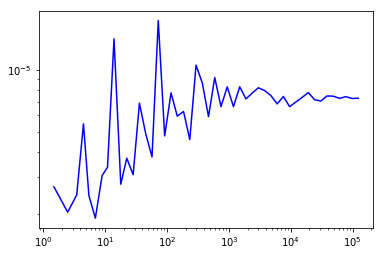

In [46]:
import powerlaw
# d=[6, 4, 0, 0, 0, 0, 0, 1, 3, 1, 0, 3, 3, 0, 0, 0, 0, 1, 1, 0, 0, 0, 3,2,  3, 3, 2, 5, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 0, 0, 0, 0, 1,0, 1, 2, 0, 0, 0, 2, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,3, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 2, 2, 3, 2, 1, 0, 0, 0, 1, 2]
fit = powerlaw.Fit(np.array(songids)+1,xmin=1,discrete=True)
fit.plot_pdf(color= 'b')

print('alpha= ',fit.power_law.alpha,'  sigma= ',fit.power_law.sigma)

Calculting the number of times each song is rated.

In [49]:
frequency = reduced_train['songid'].value_counts().to_dict()

In [50]:
train0.head()

,userid,songid,rating
0,0,166,5
1,0,2245,4
2,0,3637,4
3,0,5580,4
4,0,5859,4


In [51]:
value_cnt = train0['songid'].value_counts()

In [36]:
fre = value_cnt.tolist()
ids = value_cnt.index.tolist()

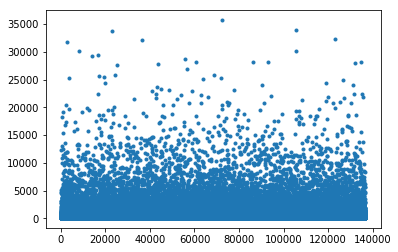

In [40]:
plt.plot(ids,fre, '.')
plt.show()

In [250]:
songid=[]
song_frequency=[]
for k,v in frequency.items():
    songid.append(k)
    song_frequency.append(v)

Plot of song id V/s frequency for that song

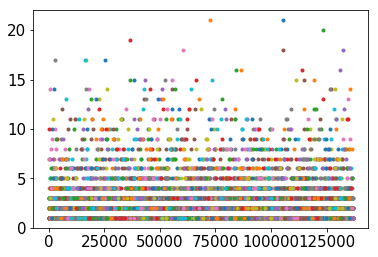

In [253]:
for k,v in frequency.items():
    plt.plot(k,v,'.')
# plt.xlim(10**2,10**3)
plt.show()

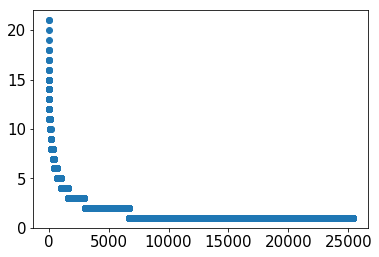

In [254]:
plt.plot(song_frequency, 'o')
plt.show()

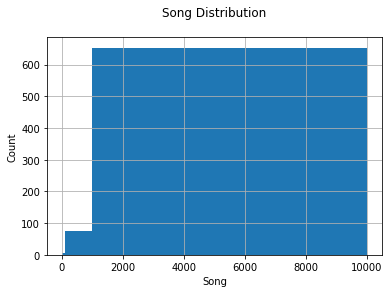

In [52]:
reduced_train.songid.hist(bins=[10,100,1000,10000])
plt.title('Song Distribution\n')
plt.xlabel('Song')
plt.ylabel('Count')
plt.savefig('system2.png', bbox_inches='tight')
plt.show()

loading the genre details table

In [16]:
genre = pd.read_csv('genre-hierarchy.txt',names = ['genreid','parentgenreid','level','genrename'],delimiter='\t',header=None)
genre.head()

,genreid,parentgenreid,level,genrename
0,0,0,1,Unknown
1,1,1,1,Electronic/Dance
2,2,1,2,Ambient
3,3,2,3,Ambient Dub
4,4,2,3,Ambient Tech


loading the song attributes table

In [18]:
song_attributes = pd.read_csv('song-attributes.txt',names = ['songid','albumid','artistid','genreid'],delimiter='\t',header=None)
song_attributes.head()

,songid,albumid,artistid,genreid
0,0,12070,8490,0
1,1,19512,7975,134
2,2,18953,3492,0
3,3,695,2653,0
4,4,243,2282,0


# Ratings distribution

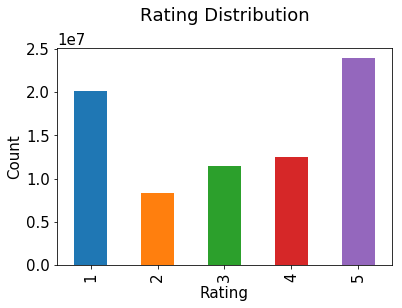

In [55]:
plt.rc("font", size=15)
train0.rating.value_counts(sort=False).plot(kind='bar')
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.savefig('system1.png', bbox_inches='tight')
plt.show()

# Recommendations based on rating counts

Considering the most popular song as the song which is rated by many users. Hence to calculate the rating counts creating a dataframe to count the number of times each song is rated in the training dataframe

In [16]:
rating_count = pd.DataFrame(train0.groupby('songid')['rating'].count())
top_5 = rating_count.sort_values('rating', ascending=False).head()
top_5

,rating
songid,
72309,35682
105433,33954
22763,33794
123176,32393
36561,32074


In [17]:
top5_songid = top_5.index.tolist()
top5_songid

[72309, 105433, 22763, 123176, 36561]

In [18]:
most_rated_songs = pd.DataFrame(top5_songid, index=np.arange(5), columns = ['songid'])
most_rated_songs_summary = pd.merge(most_rated_songs, song_attributes, on='songid')
most_rated_songs_summary

,songid,albumid,artistid,genreid
0,72309,19710,5834,0
1,105433,19325,2883,0
2,22763,19598,6823,134
3,123176,16295,3101,0
4,36561,4237,4701,0


Hence here the top five songs which are most rated are [72309, 105433, 22763, 123176, 36561]. These are the most popular songs based on the rating count. Here we are not considering the what rating the song has received, one case might be that the most rated song might have the average rating '2'. Hence this is not a good recommendation. Thus recommending based on rating count is not a good idea, since it could lead us to misleading recommendtions.

# Recommending most popular songs

To overcome the limitation of recommendation using rating count we calculate the top 10 songs which are given rating '5' and are also the most rated song amount all the other songs which recieved rating '5'.

Here we will be calculating the most popular songs as the most rated songs from the dataset which are given rating 5 by the user.

In [19]:
r5 = train0.query('rating==5')

In [20]:
pop = r5['songid'].value_counts(sort=True)
pop_idx = pop.index.tolist()
top_10 = pop_idx[:10]
print(top_10)
string = ""
for s in top_10:
    string+='songid=='+str(s)+' or '
query = string[:-4]
print(query)

[92881, 13859, 64009, 36561, 105433, 8063, 72309, 135481, 126757, 119065]
songid==92881 or songid==13859 or songid==64009 or songid==36561 or songid==105433 or songid==8063 or songid==72309 or songid==135481 or songid==126757 or songid==119065


In [21]:
top_df = train0.query(query)
average_rating_dict = {}
r = top_df.query('songid == 8063')['rating']
for song in top_10:
    r = top_df.query('songid == '+str(song))['rating']
    avg = r.mean()
    average_rating_dict[song] = avg
average_rating_dict

{8063: 3.5023366809187633,
 13859: 3.636993548827525,
 36561: 3.433871671759057,
 64009: 3.7541774675972084,
 72309: 3.095482316013676,
 92881: 3.7491451773756945,
 105433: 3.4090239736113563,
 119065: 3.680703908328218,
 126757: 3.425478934896984,
 135481: 3.730458945858731}

In [22]:
top_10_df = pd.DataFrame(columns=['Song ID','Average Rating'])
for k,v in average_rating_dict.items():
    top_10_df=top_10_df.append({'Song ID': k,'Average Rating':v}, ignore_index=True)
print('\n\n************POPULAR SONGS***************\n')
print(top_10_df)



************POPULAR SONGS***************

    Song ID  Average Rating
0   92881.0        3.749145
1   13859.0        3.636994
2   64009.0        3.754177
3   36561.0        3.433872
4  105433.0        3.409024
5    8063.0        3.502337
6   72309.0        3.095482
7  135481.0        3.730459
8  126757.0        3.425479
9  119065.0        3.680704


All the most popular highly rated songs will be reccommended to everyone.

# Recommendations based on correlations

To overcome the limilations of recommendation using rating count, we try a different approach based on the correlations. The correlations can be between songid's or userid's. 

The term "correlation" refers to a mutual relationship or association between quantities. 

Theoretical Concept

Pearson Correlation

Pearson's correlation coefficient is the covariance of the two variables divided by the product of their standard deviations.

OR

Pearson correlation score measures how much 2 variables change together divided by the product of how much they change individually. The more the variables change together relative to how they change individually, the higher the correlation.

It has a value between +1 and −1, where 1 is total positive linear correlation, 0 is no linear correlation, and −1 is total negative linear correlation.

We use Pearsons’R correlation coefficient to measure the linear correlation between two variables, in our case, the ratings for two songs.

First, we need to find out the average rating, and the number of ratings each song received.

Since we have computaional limitation trying this on a reducd dataset and not the complete dataset

In [23]:
avg_rating = (reduced_train.groupby(by = ['songid'])['rating'].mean().reset_index().rename(columns = {'rating': 'averagerating'})[['songid', 'averagerating']])

In [24]:
avg_rating.head()

,songid,averagerating
0,37,2.0
1,41,3.0
2,69,3.0
3,106,1.0
4,107,4.0


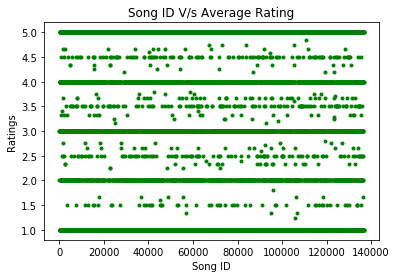

In [25]:
plt.plot(avg_rating['songid'],avg_rating['averagerating'],'g.')
plt.xlabel("Song ID")
plt.ylabel("Ratings")
plt.title("Song ID V/s Average Rating")
plt.show()

In [26]:
average_rating = pd.DataFrame(reduced_train.groupby('songid')['rating'].mean())
average_rating['ratingCount'] = pd.DataFrame(train0.groupby('songid')['rating'].count())
average_rating.sort_values('ratingCount', ascending=False).head()

,rating,ratingCount
songid,,
72309,2.000000,35682
105433,4.750000,33954
22763,2.250000,33794
123176,3.285714,32393
36561,4.000000,32074


Observations: In this data set, the song that received the most rating counts was not top rated. As a result, if we were to use recommendations based on rating counts, we would definitely make mistakes here. So, we need to have a better system.

Rating matrix

We convert the ratings table to a 2D matrix. The matrix will be sparse because not every user rated every song.

In [28]:
ratings_pivot = reduced_train.pivot(index='userid', columns='songid').rating
userid = ratings_pivot.index
songid = ratings_pivot.columns
print(ratings_pivot.shape)
ratings_pivot.head()

(8939, 8335)


songid,37,41,69,106,107,123,131,140,152,163,...,136561,136582,136590,136593,136604,136619,136649,136656,136694,136701
userid,,,,,,,,,,,,,,,,,,,,,
33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let’s find out which songs are correlated with the 2nd most rated song 22763.

for calculating pearson's correlation we need to remove the nan values, hence replacing it with 0

In [29]:
ratings_pivot = ratings_pivot.fillna(0)

In [30]:
song2_ratings = ratings_pivot[top5_songid[1]]
top5_songid[1]

105433

In [39]:
song2_ratings = ratings_pivot[top5_songid[1]]
similar_to_song2 = ratings_pivot.corrwith(song2_ratings)
corr_song2 = pd.DataFrame(similar_to_song2, columns=['pearsonR'])

In [40]:
corr_summary = corr_song2.join(average_rating['ratingCount'])
corr_summary.sort_values('pearsonR', ascending=False).head(10)

,pearsonR,ratingCount
songid,,
105433,1.000000,33954
61301,-0.000223,647
95097,-0.000223,1609
42722,-0.000223,3014
25340,-0.000223,2382
101448,-0.000223,676
76872,-0.000223,2380
98772,-0.000223,2533
37438,-0.000223,525


# Collaborative Filtering Using k-Nearest Neighbors (kNN)

kNN is a machine learning algorithm to find clusters of similar users based on common song ratings, and make predictions using the average rating of top-k nearest neighbors. For example, we first present ratings in a matrix with the matrix having one row for each item (song) and one column for each user, like so:

We then find the k item that has the most similar user engagement vectors.
Starting from the original data set, we will be only looking at the popular books. In order to find out which songs are popular, we combine song data with ratings data.

for my train data

In [40]:
combine_song_rating_mytrain = pd.merge(training, song_attributes, on='songid')
combine_song_rating_mytrain = pd.merge(combine_song_rating_mytrain, genre, on='genreid')
combine_song_rating_mytrain.head()

,userid,songid,rating,albumid,artistid,genreid,parentgenreid,level,genrename
0,5,105433,4,19325,2883,0,0,1,Unknown
1,57,105433,5,19325,2883,0,0,1,Unknown
2,58,105433,5,19325,2883,0,0,1,Unknown
3,288,105433,4,19325,2883,0,0,1,Unknown
4,407,105433,4,19325,2883,0,0,1,Unknown


for R5 dataset

In [19]:
combine_song_rating_r5 = pd.merge(rating_5_train, song_attributes, on='songid')
combine_song_rating_r5 = pd.merge(combine_song_rating_r5, genre, on='genreid')
combine_song_rating_r5.head()

,userid,songid,rating,albumid,artistid,genreid,parentgenreid,level,genrename
0,0,166,5,5303,7231,0,0,1,Unknown
1,0,16794,5,2517,7620,0,0,1,Unknown
2,11,16794,5,2517,7620,0,0,1,Unknown
3,21,16794,5,2517,7620,0,0,1,Unknown
4,23,16794,5,2517,7620,0,0,1,Unknown


for ratings dataset

In [20]:
combine_song_rating = pd.merge(reduced_train, song_attributes, on='songid')
combine_song_rating = pd.merge(combine_song_rating, genre, on='genreid')
combine_song_rating.head()

,userid,songid,rating,albumid,artistid,genreid,parentgenreid,level,genrename
0,133463,60148,3,10292,444,0,0,1,Unknown
1,180256,32141,1,14564,5436,0,0,1,Unknown
2,180975,14576,3,15511,2999,0,0,1,Unknown
3,41942,98497,1,18016,8588,0,0,1,Unknown
4,178057,91439,5,10115,8481,0,0,1,Unknown


for my train data

In [42]:
combine_song_rating_mytrain = combine_song_rating_mytrain.dropna(axis = 0, subset = ['songid'])
song_ratingCount_mytrain = (combine_song_rating_mytrain.groupby(by = ['songid'])['rating'].count().reset_index().rename(columns = {'rating': 'totalRatingCount'})[['songid', 'totalRatingCount']])
song_ratingCount_mytrain

,songid,totalRatingCount
0,22763,1880
1,36561,1534
2,72309,1516
3,105433,1720
4,123176,1583


for R5 dataset

In [21]:
combine_song_rating_r5 = combine_song_rating_r5.dropna(axis = 0, subset = ['songid'])
song_ratingCount_r5 = (combine_song_rating_r5.groupby(by = ['songid'])['rating'].count().reset_index().rename(columns = {'rating': 'totalRatingCount'})[['songid', 'totalRatingCount']])
song_ratingCount_r5.head()

,songid,totalRatingCount
0,14,1
1,69,1
2,115,1
3,137,1
4,149,1


for ratings dataset

In [22]:
combine_song_rating = combine_song_rating.dropna(axis = 0, subset = ['songid'])
song_ratingCount = (combine_song_rating.groupby(by = ['songid'])['rating'].count().reset_index().rename(columns = {'rating': 'totalRatingCount'})[['songid', 'totalRatingCount']])
song_ratingCount.head()

,songid,totalRatingCount
0,14,1
1,32,1
2,37,1
3,47,1
4,51,1


for my train data

In [43]:
rating_with_totalRatingCount_mytrain = combine_song_rating_mytrain.merge(song_ratingCount_mytrain, left_on = 'songid', right_on = 'songid', how = 'left')
rating_with_totalRatingCount_mytrain.head()

,userid,songid,rating,albumid,artistid,genreid,parentgenreid,level,genrename,totalRatingCount
0,5,105433,4,19325,2883,0,0,1,Unknown,1720
1,57,105433,5,19325,2883,0,0,1,Unknown,1720
2,58,105433,5,19325,2883,0,0,1,Unknown,1720
3,288,105433,4,19325,2883,0,0,1,Unknown,1720
4,407,105433,4,19325,2883,0,0,1,Unknown,1720


for R5 dataset

In [23]:
rating_with_totalRatingCount_r5 = combine_song_rating_r5.merge(song_ratingCount_r5, left_on = 'songid', right_on = 'songid', how = 'left')
rating_with_totalRatingCount_r5.head()

,userid,songid,rating,albumid,artistid,genreid,parentgenreid,level,genrename,totalRatingCount
0,0,166,5,5303,7231,0,0,1,Unknown,1
1,0,16794,5,2517,7620,0,0,1,Unknown,5
2,11,16794,5,2517,7620,0,0,1,Unknown,5
3,21,16794,5,2517,7620,0,0,1,Unknown,5
4,23,16794,5,2517,7620,0,0,1,Unknown,5


for ratings dataset

In [24]:
rating_with_totalRatingCount = combine_song_rating.merge(song_ratingCount, left_on = 'songid', right_on = 'songid', how = 'left')
rating_with_totalRatingCount.head()

,userid,songid,rating,albumid,artistid,genreid,parentgenreid,level,genrename,totalRatingCount
0,133463,60148,3,10292,444,0,0,1,Unknown,1
1,180256,32141,1,14564,5436,0,0,1,Unknown,1
2,180975,14576,3,15511,2999,0,0,1,Unknown,1
3,41942,98497,1,18016,8588,0,0,1,Unknown,1
4,178057,91439,5,10115,8481,0,0,1,Unknown,1


In [44]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print("\tratings dataset\n")
print(song_ratingCount['totalRatingCount'].describe())
print("\n--------------------------------------------------------------\n")
print("\tR5 dataset\n")
print(song_ratingCount_r5['totalRatingCount'].describe())
print("\n--------------------------------------------------------------\n")
print("\tMy train dataset\n")
print(song_ratingCount_mytrain['totalRatingCount'].describe())

	ratings dataset

count   8416.000
mean       1.188
std        0.573
min        1.000
25%        1.000
50%        1.000
75%        1.000
max        8.000
Name: totalRatingCount, dtype: float64

--------------------------------------------------------------

	R5 dataset

count   4468.000
mean       1.119
std        0.406
min        1.000
25%        1.000
50%        1.000
75%        1.000
max        5.000
Name: totalRatingCount, dtype: float64

--------------------------------------------------------------

	My train dataset

count      5.000
mean    1646.600
std      153.006
min     1516.000
25%     1534.000
50%     1583.000
75%     1720.000
max     1880.000
Name: totalRatingCount, dtype: float64


In [45]:
print("\tratings dataset\n")
print(song_ratingCount['totalRatingCount'].quantile(np.arange(.9, 1, .01)))
print("\n--------------------------------------------------------------\n")
print("\tR5 dataset\n")
print(song_ratingCount_r5['totalRatingCount'].quantile(np.arange(.9, 1, .01)))
print("\n--------------------------------------------------------------\n")
print("\tMy train dataset\n")
print(song_ratingCount_mytrain['totalRatingCount'].quantile(np.arange(.9, 1, .01)))

	ratings dataset

0.900   2.000
0.910   2.000
0.920   2.000
0.930   2.000
0.940   2.000
0.950   2.000
0.960   2.000
0.970   3.000
0.980   3.000
0.990   4.000
Name: totalRatingCount, dtype: float64

--------------------------------------------------------------

	R5 dataset

0.900   1.000
0.910   2.000
0.920   2.000
0.930   2.000
0.940   2.000
0.950   2.000
0.960   2.000
0.970   2.000
0.980   2.000
0.990   3.000
Name: totalRatingCount, dtype: float64

--------------------------------------------------------------

	My train dataset

0.900   1816.000
0.910   1822.400
0.920   1828.800
0.930   1835.200
0.940   1841.600
0.950   1848.000
0.960   1854.400
0.970   1860.800
0.980   1867.200
0.990   1873.600
Name: totalRatingCount, dtype: float64


For my training data

In [60]:
user_rating_pivot_mytrain = rating_with_totalRatingCount_mytrain.pivot(index = 'songid', columns = 'userid', values = 'rating').fillna(0)
user_rating_pivot_mytrain.head()

userid,5,57,58,83,154,178,189,197,288,350,...,199781,199835,199844,199851,199857,199882,199892,199917,199945,199969
songid,,,,,,,,,,,,,,,,,,,,,
22763,0.000,0.000,0.000,1.000,0.000,3.000,1.000,0.000,0.000,0.000,...,0.000,1.000,0.000,0.000,2.000,4.000,0.000,0.000,3.000,0.000
36561,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5.000,0.000,3.000,...,1.000,0.000,0.000,0.000,0.000,5.000,3.000,0.000,0.000,0.000
72309,0.000,0.000,0.000,0.000,5.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.000
105433,4.000,5.000,5.000,0.000,0.000,0.000,0.000,0.000,4.000,0.000,...,0.000,0.000,3.000,3.000,0.000,0.000,0.000,1.000,0.000,0.000
123176,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.000,4.000,0.000


for R5 dataset

In [27]:
user_rating_pivot_r5 = rating_with_totalRatingCount_r5.pivot(index = 'songid', columns = 'userid', values = 'rating').fillna(0)
user_rating_pivot_r5.head()

userid,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
songid,,,,,,,,,,,,,,,,,,,,,
14,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
69,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
115,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
137,0.000,0.000,0.000,0.000,0.000,0.000,5.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
149,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


for ratings dataset

In [28]:
user_rating_pivot = rating_with_totalRatingCount.pivot(index = 'songid', columns = 'userid', values = 'rating').fillna(0)

In [29]:
user_rating_pivot.head()

userid,12,20,23,36,38,61,91,100,102,106,...,199772,199777,199797,199847,199887,199937,199961,199970,199979,199995
songid,,,,,,,,,,,,,,,,,,,,,
14,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
32,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
37,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
47,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
51,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [30]:
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

In [31]:
user_rating_matrix_r5 = csr_matrix(user_rating_pivot_r5.values)

In [32]:
user_rating_matrix = csr_matrix(user_rating_pivot.values)

In [47]:
user_rating_matrix_mytrain =  csr_matrix(user_rating_pivot_mytrain.values)

In [62]:
model_cosine_mytrain = NearestNeighbors(metric='cosine',algorithm='brute').fit(user_rating_matrix_mytrain)
model_jaccard_mytrain = NearestNeighbors(metric='jaccard',algorithm='brute').fit(user_rating_pivot_mytrain)

In [33]:
model_cosine_r5 = NearestNeighbors(metric='cosine',algorithm='brute').fit(user_rating_matrix_r5)
model_jaccard_r5 = NearestNeighbors(metric='jaccard',algorithm='brute').fit(user_rating_pivot_r5)

In [34]:
model_cosine = NearestNeighbors(metric='cosine',algorithm='brute').fit(user_rating_matrix)
model_jaccard = NearestNeighbors(metric='jaccard',algorithm='brute').fit(user_rating_pivot)

In [68]:
reco_cosine_df_mytrain = pd.DataFrame(columns=['songid','recommendations'])
reco_jaccard_df_mytrain = pd.DataFrame(columns=['songid','recommendations'])

In [35]:
reco_cosine_df_r5 = pd.DataFrame(columns=['songid','recommendations'])
reco_jaccard_df_r5 = pd.DataFrame(columns=['songid','recommendations'])

In [36]:
reco_cosine_df = pd.DataFrame(columns=['songid','recommendations'])
reco_jaccard_df = pd.DataFrame(columns=['songid','recommendations'])

In [66]:
def getrecos(model,k,songid,pivot_table):
    distances, indices = model.kneighbors(pivot_table.loc[songid].reshape(1, -1), n_neighbors = k)
    recos = user_rating_pivot.index[indices.flatten()].tolist()
    return recos

recommendations for my train dataset using cosine similarity

In [69]:
for song in user_rating_pivot_mytrain.index.tolist():
    reco = getrecos(model_cosine_mytrain,4,song,user_rating_pivot_mytrain)
    reco_cosine_df_mytrain = reco_cosine_df_mytrain.append({'songid':song,'recommendations':reco[1:]},ignore_index=True)
reco_cosine_df_mytrain

,songid,recommendations
0,22763,"[47, 51, 37]"
1,36561,"[51, 37, 47]"
2,72309,"[51, 47, 32]"
3,105433,"[51, 14, 37]"
4,123176,"[47, 14, 37]"


In [55]:
user_rating_pivot_mytrain

userid,5,57,58,83,154,178,189,197,288,350,...,199781,199835,199844,199851,199857,199882,199892,199917,199945,199969
songid,,,,,,,,,,,,,,,,,,,,,
22763,0.000,0.000,0.000,1.000,0.000,3.000,1.000,0.000,0.000,0.000,...,0.000,1.000,0.000,0.000,2.000,4.000,0.000,0.000,3.000,0.000
36561,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5.000,0.000,3.000,...,1.000,0.000,0.000,0.000,0.000,5.000,3.000,0.000,0.000,0.000
72309,0.000,0.000,0.000,0.000,5.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.000
105433,4.000,5.000,5.000,0.000,0.000,0.000,0.000,0.000,4.000,0.000,...,0.000,0.000,3.000,3.000,0.000,0.000,0.000,1.000,0.000,0.000
123176,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.000,4.000,0.000


recommendations for R5 dataset using cosine similarity

In [38]:
for song in user_rating_pivot_r5.index.tolist():
    reco = getrecos(model_cosine_r5,6,song,user_rating_pivot_r5)
    reco_cosine_df_r5 = reco_cosine_df_r5.append({'songid':song,'recommendations':reco[1:]},ignore_index=True)
reco_cosine_df_r5.head()

,songid,recommendations
0,14,"[32277, 32480, 32469, 32400, 32744]"
1,69,"[18556, 57959, 58022, 57760, 18369]"
2,115,"[52866, 4316, 38404, 18630, 1321]"
3,137,"[33197, 51597, 15466, 58825, 42748]"
4,149,"[10954, 65507, 12929, 53668, 14671]"


recommendation for rating dataset using cosine similarity

In [39]:
for song in reduced_train['songid'].tolist():
    reco = getrecos(model_cosine,6,song,user_rating_pivot)
    reco_cosine_df = reco_cosine_df.append({'songid':song,'recommendations':reco[1:]},ignore_index=True)
reco_cosine_df.head()

,songid,recommendations
0,60148,"[80156, 91575, 91591, 91576, 91573]"
1,32141,"[91590, 91591, 91611, 91576, 91657]"
2,14576,"[14576, 91591, 91597, 91590, 91575]"
3,42951,"[91591, 91576, 91611, 91590, 91663]"
4,98497,"[98497, 91590, 91576, 91591, 91573]"


recommendation for R5 dataset using jaccard similarity

In [63]:
for song in user_rating_pivot_r5.index.tolist():
    reco = getrecos(model_jaccard_r5,6,song,user_rating_pivot_r5)
    reco_jaccard_df_r5 = reco_jaccard_df_r5.append({'songid':song,'recommendations':reco[1:]},ignore_index=True)
reco_jaccard_df_r5.head()

,songid,recommendations
0,14,"[31473, 31891, 31836, 31693, 32387]"
1,69,"[18591, 57520, 57570, 57472, 18271]"
2,115,"[52233, 3766, 38439, 18732, 894]"
3,137,"[33232, 50788, 15289, 58475, 42287]"
4,149,"[10671, 64417, 12679, 53173, 14423]"


recommendation for rating dataset using jaccard similarity

In [ ]:
for song in user_rating_pivot.index.tolist():
    reco = getrecos(model_jaccard,6,song,user_rating_pivot)
    reco_jaccard_df = reco_jaccard_df.append({'songid':song,'recommendations':reco[1:]},ignore_index=True)
reco_jaccard_df.head()

In [81]:
pre_rec_df = pd.DataFrame(columns=['SongID','Precision','Recall'])

In [106]:
length = reco_cosine_df.shape[0]
for i in range(0,500):
    song=reco_cosine_df.loc[i]['songid']
    song_ids=reco_cosine_df.loc[i]['recommendations']
    avg_df = train0.query('songid == '+str(song))
    threshold = avg_df['rating'].mean()
    avg_df1 = avg_df.query('rating > '+str(threshold))
    total_rel_songs = len(np.unique(avg_df1['userid']))
    merge  = rating_with_totalRatingCount.loc[rating_with_totalRatingCount['songid'].isin(song_ids)]
    relevant_recos = (merge.groupby(by = ['songid'])['rating'].mean().reset_index().rename(columns = {'rating': 'averagerating'})[['songid', 'averagerating']])
    there = relevant_recos.query("averagerating > "+str(threshold))
    number_of_relevant_recos = there.shape[0]
    precision = number_of_relevant_recos/5
    recall = number_of_relevant_recos/total_rel_songs
#     f1_score = 2*((precision*recall)/(precision+recall))
    pre_rec_df = pre_rec_df.append({'SongID':song,'Precision':precision,'Recall':recall},ignore_index=True)

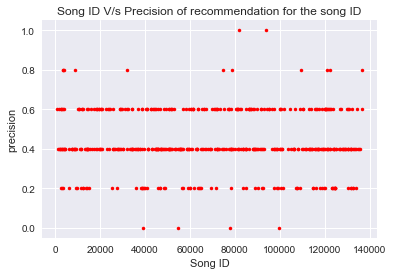

In [99]:
plt.plot(pre_rec_df['SongID'],pre_rec_df['Precision'],'r.')
plt.xlabel("Song ID")
plt.ylabel("precision")
plt.title("Song ID V/s Precision of recommendation for the song ID")
plt.show()

In [87]:
import seaborn as sns; sns.set()

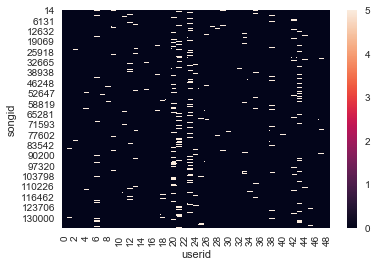

In [91]:
ax = sns.heatmap(user_rating_pivot_r5)

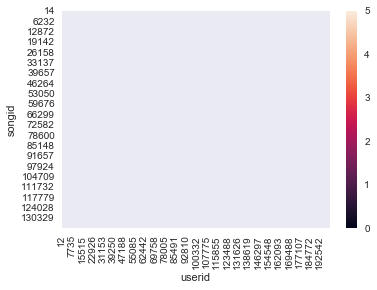

In [92]:
ax = sns.heatmap(user_rating_pivot)

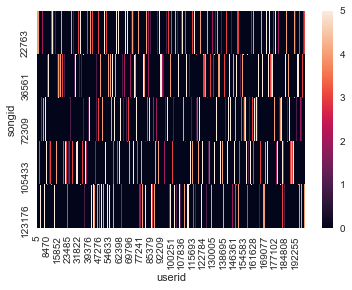

In [93]:
ax = sns.heatmap(user_rating_pivot_mytrain)